In [2]:
import os
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
from scipy.stats import norm, skew, kurtosis, zscore, shapiro

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

#Pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
#change directory for your path
os.chdir('E:\\OneDrive\\Documents\\GitHub\\eHealthEquity\\Research\\Data Source')

# Import
Data import and columns for analysis

In [5]:
df = pd.read_csv('acs5y_2021_brfss_2021_merged.csv')

index_list = [
    'state','county'
]
brfss_list = [
    col for col in df.columns if col.startswith('brfss_') 
    and not col.endswith('crdprv') and not col.endswith('upper') 
    and not col.endswith('lower')
]
acs_list = [
    col for col in df.columns if col.startswith('pct_')
]

all_columns = index_list + brfss_list + acs_list

df = df[all_columns]

In [6]:
df.head()

state          county  brfss_access2_ageadjprv  brfss_checkup_ageadjprv  \
0  Alaska  Aleutians East                     16.9                     60.7   
1  Alaska  Aleutians West                     13.7                     61.6   
2  Alaska       Anchorage                     10.4                     62.9   
3  Alaska          Bethel                     19.2                     62.6   
4  Alaska     Bristol Bay                     10.3                     61.4   

   brfss_csmoking_ageadjprv  brfss_depression_ageadjprv  \
0                      18.6                        13.1   
1                      15.5                        13.4   
2                      14.9                        19.5   
3                      35.4                        21.2   
4                      18.7                        18.8   

   brfss_diabetes_ageadjprv  brfss_ghlth_ageadjprv  brfss_mhlth_ageadjprv  \
0                      12.6                   19.1                   12.9   
1                      10.9                   15.3                   12.2   
2                       7.8                   13.5                   14.5   
3                      15.9                   30.0                   21.4   
4                       8.6                   14.4                   15.4   

   brfss_obesity_ageadjprv  pct_ed_lt9  pct_ed_9_12  pct_ed_hs  pct_ed_sc  \
0                     31.3         6.1          9.2       41.6       21.9   
1                     30.3         4.8          4.1       43.4       25.1   
2                     32.9         2.2          3.7       23.7       25.0   
3                     43.1         6.9         11.2       46.6       18.1   
4                     35.6         3.0          2.3       30.2       33.7   

   pct_ed_asc  pct_ed_b  pct_ed_gr  pct_age_gte65  pct_race_white  \
0         5.4      10.6        5.4           11.7            14.6   
1         5.8      14.4        2.4            7.0            24.5   
2         8.6      22.8       14.0           11.5            60.3   
3         4.5       7.3        5.5            7.5             9.6   
4         8.7      16.8        5.3           13.1            44.8   

   pct_race_black  pct_race_aian  pct_race_asian  pct_race_nhopi  \
0             2.1           44.1            20.9             0.3   
1             3.5           10.5            45.8             1.7   
2             5.4            7.2             9.7             2.9   
3             0.9           84.5             1.4             0.2   
4             0.6           33.2             4.1             1.5   

   pct_race_other  pct_eth_hisp  pct_sex_male  pct_sex_female  pct_occ_unemp  \
0             6.5          10.5          59.1            40.9            3.5   
1             5.5           9.7          57.0            43.0            3.1   
2             2.7           9.5          51.2            48.8            3.6   
3             0.2           2.1          52.5            47.5           11.3   
4             2.9          12.8          56.5            43.5            1.6   

   pct_occ_mgt  pct_occ_svc  pct_occ_sales  pct_occ_nat_res  pct_occ_prod  \
0         23.9         13.2           11.7             12.7          38.6   
1         16.1         15.5           23.3             10.9          34.1   
2         41.6         18.0           21.0              8.3          11.1   
3         34.4         20.5           24.4              7.4          13.3   
4         37.2         11.5           17.8             17.6          15.8   

   pct_hlth_unins  pct_ses_pov  pct_tp_veh_0  pct_tp_veh_1  pct_tp_veh_2  \
0            40.0         13.4          24.0          37.2          28.0   
1            19.6          8.3          14.2          39.8          35.5   
2            10.5          9.1           5.5          32.9          39.8   
3            15.1         28.5          60.1          23.9          11.6   
4            17.0          3.5           9.8          39.4          24.8   

   pct_tp_veh_3  pct_dg

In [7]:
df.dtypes

state                          object
county                         object
brfss_access2_ageadjprv       float64
brfss_checkup_ageadjprv       float64
brfss_csmoking_ageadjprv      float64
brfss_depression_ageadjprv    float64
brfss_diabetes_ageadjprv      float64
brfss_ghlth_ageadjprv         float64
brfss_mhlth_ageadjprv         float64
brfss_obesity_ageadjprv       float64
pct_ed_lt9                    float64
pct_ed_9_12                   float64
pct_ed_hs                     float64
pct_ed_sc                     float64
pct_ed_asc                    float64
pct_ed_b                      float64
pct_ed_gr                     float64
pct_age_gte65                 float64
pct_race_white                float64
pct_race_black                float64
pct_race_aian                 float64
pct_race_asian                float64
pct_race_nhopi                float64
pct_race_other                float64
pct_eth_hisp                  float64
pct_sex_male                  float64
pct_sex_fema

# Exploratory Data Analysis
1. Descriptive Statistics
2. Visualization
3. Preprocessing
4. Transformation

In [8]:
print("Number of Counties and Total Features", df.shape)

Number of Counties and Total Features (3076, 40)


## Missing/Null Data

In [9]:
#null by column, only show greater than 0 and show amount
nulls = df.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

## Descriptive Statistics

In [11]:
stats_df = df.describe().loc[['mean', 'std', '50%', 'min', 'max']]
stats_df.T.style.background_gradient(cmap='plasma')

# Key Insight: 
- Population metrics of race and ethnicity do not match Census data. For Example: ACS data (2021) shows 80% of the population is white, 2020 Census data shows 61.6% in 2020. ACS respondents do not perfectly match the population. Census Bureau indicates that updated wording in census questions may have contributed to the difference in race totals. 

## Distribution Analysis

In [12]:
desc_df = pd.DataFrame(columns=['feature', 'mean', 'std', 'skew', 'kurtosis'])
features = df.select_dtypes(include=[np.number]).columns
desc_df['feature'] = features
desc_df['mean'] = df[features].mean().values
desc_df['std'] = df[features].std().values
desc_df['skew'] = df[features].skew().values
desc_df['kurtosis'] = df[features].kurtosis().values

display(desc_df)

feature       mean        std       skew    kurtosis
0      brfss_access2_ageadjprv  12.257965   5.642848   2.107293    6.632905
1      brfss_checkup_ageadjprv  72.327796   4.455203  -0.768270    0.375633
2     brfss_csmoking_ageadjprv  19.000260   4.080862   0.474461    1.431582
3   brfss_depression_ageadjprv  23.043173   3.283014   0.007416   -0.097413
4     brfss_diabetes_ageadjprv  10.566775   2.261324   1.039886    1.685440
5        brfss_ghlth_ageadjprv  17.723927   4.563984   0.748941    0.463330
6        brfss_mhlth_ageadjprv  17.146261   2.128703   0.083138   -0.163402
7      brfss_obesity_ageadjprv  37.422172   4.545114  -0.602845    1.110271
8                   pct_ed_lt9   4.424447   3.466028   3.690470   29.472990
9                  pct_ed_9_12   7.593596   3.446065   0.947911    1.659929
10                   pct_ed_hs  33.964564   7.513747  -0.282498    0.004606
11                   pct_ed_sc  21.509363   3.913367   0.178423    0.709722
12                  pct_ed_asc   9.503674   2.962155   1.174695    9.827137
13                    pct_ed_b  14.848895   5.826326   0.950158    1.148679
14                   pct_ed_gr   8.155039   4.715969   2.122896    7.336016
15               pct_age_gte65  19.137386   4.629210   0.605006    1.110419
16              pct_race_white  80.523960  17.189236  -1.505021    2.103693
17              pct_race_black   8.825975  14.450013   2.349037    5.504620
18               pct_race_aian   1.982055   7.912436   7.696848   66.658238
19              pct_race_asian   1.419018   2.931693   6.809628   65.935254
20              pct_race_nhopi   0.099740   0.537195  20.417653  505.682630
21              pct_race_other   2.433453   3.969916   4.873134   35.043984
22                pct_eth_hisp   9.681307  14.016291   3.057726   10.738296
23                pct_sex_male  50.343108   2.396472   2.497769   11.367276
24              pct_sex_female  49.656892   2.396472  -2.497769   11.367276
25               pct_occ_unemp   2.954356   1.378524   2.202239   16.626870
26                 pct_occ_mgt  33.597269   7.149974   0.924736    1.731558
27                 pct_occ_svc  17.534200   3.732485   0.848384    2.488990
28               pct_occ_sales  19.596196   3.020731  -0.465568    2.321047
29             pct_occ_nat_res  12.379681   4.179799   1.088463    3.418339
30                pct_occ_prod  16.893433   5.916437   0.398288    0.025463
31              pct_hlth_unins   9.608127   5.150514   1.547119    4.177119
32                 pct_ses_pov  14.401658   6.152201   1.196015    3.043360
33                pct_tp_veh_0   6.078316   4.511482   7.584077   97.263805
34                pct_tp_veh_1  29.101398   5.722047   0.219941    2.213234
35                pct_tp_veh_2  36.813687   4.610280  -0.954653    5.971907
36                pct_tp_veh_3  28.003706   7.584240   0.365086    1.088335
37               pct_dg_bb_int  80.485826   7.894527  -1.021739    1.831595

In [13]:
def analyze_distribution(df, column_name, z_threshold=3):
    # Check for Gaussian distribution
    mu, std = norm.fit(df[column_name])
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column_name], kde=True)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)

    skewness = sp.stats.skew(df[column_name])
    kurt = sp.stats.kurtosis(df[column_name])
    z_scores = zscore(df[column_name])
    outliers = df[column_name][np.abs(z_scores) > z_threshold]

    plt.title(f'Fit results: mean = {mu:.2f}, std = {std:.2f}, skew = {skewness:.2f}, kurt = {kurt:.2f}')
    plt.show()
    stats.probplot(df[column_name], dist=norm, plot=plt)
    plt.title(f'QQ Plot: {column_name}')
    plt.show()

    return mu, std, skewness, kurt, outliers

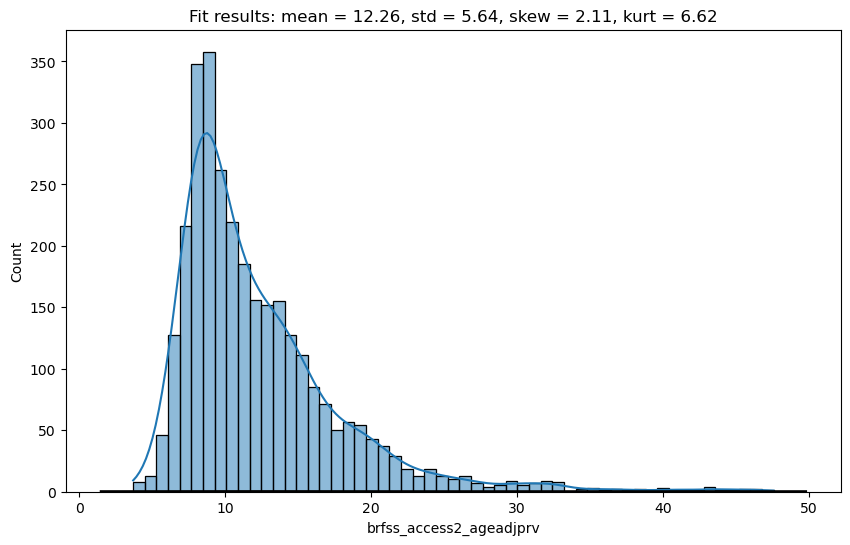

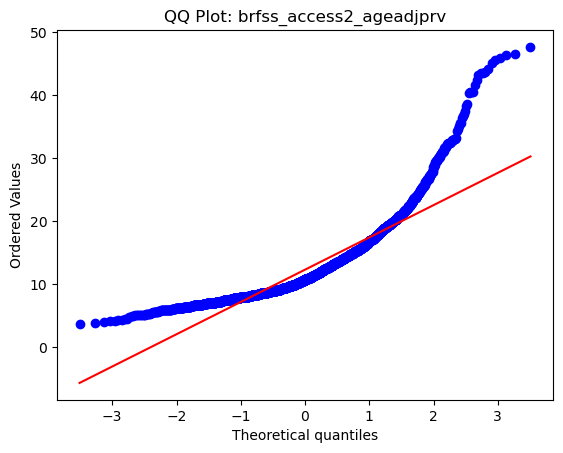

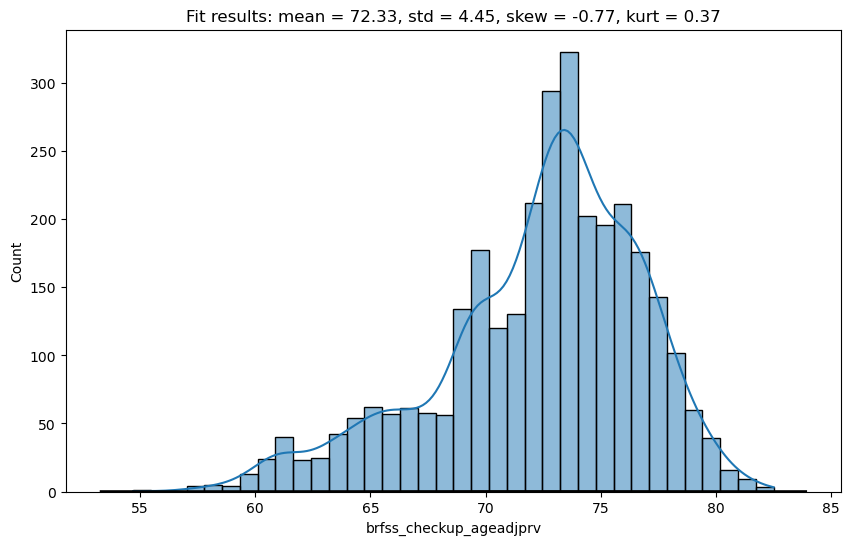

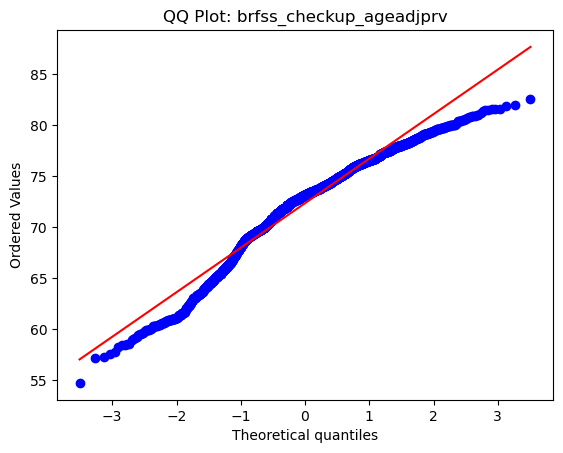

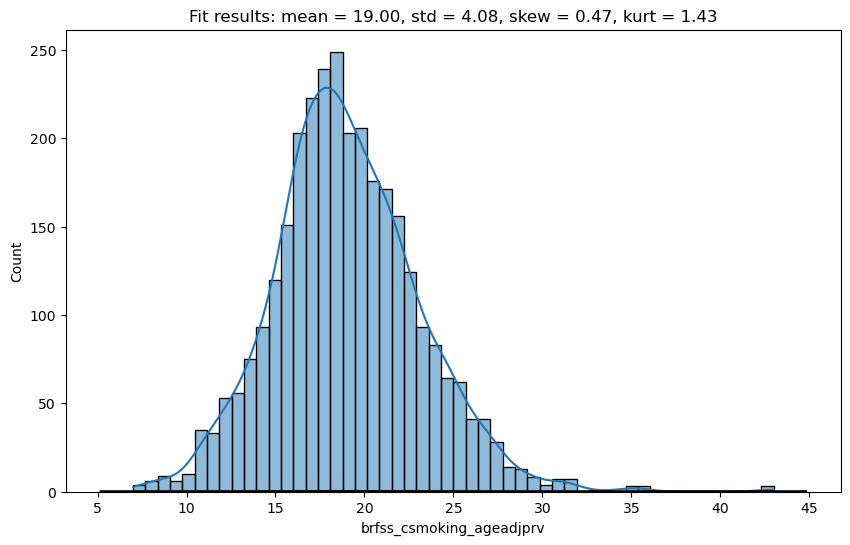

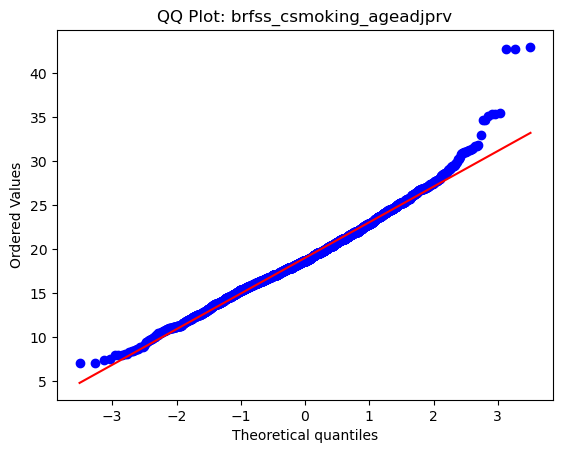

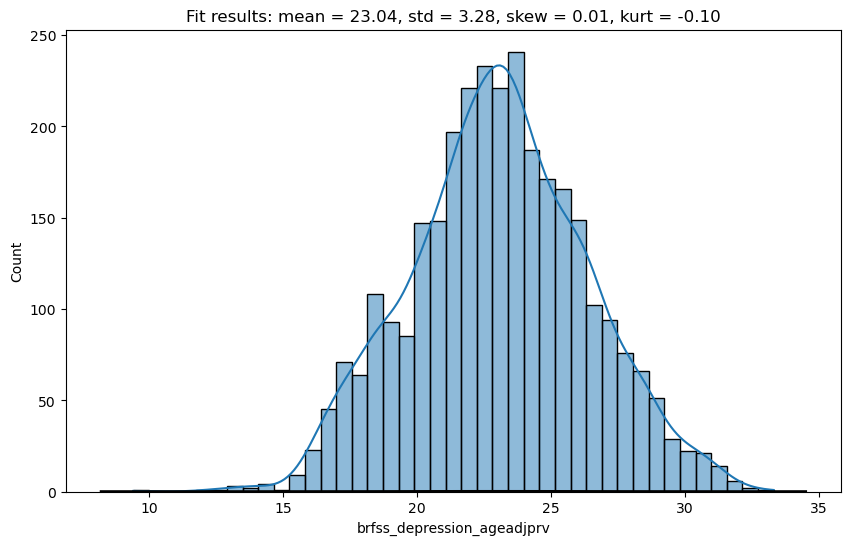

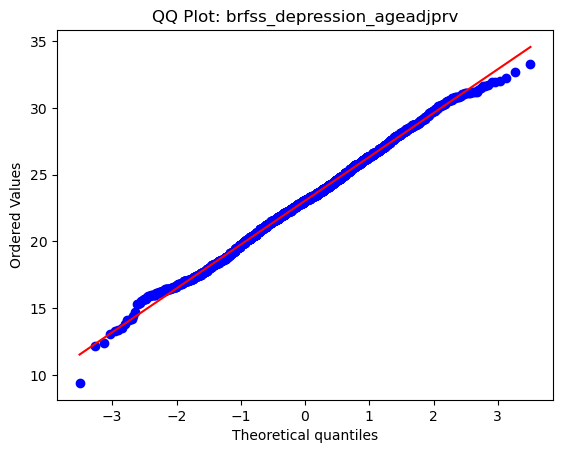

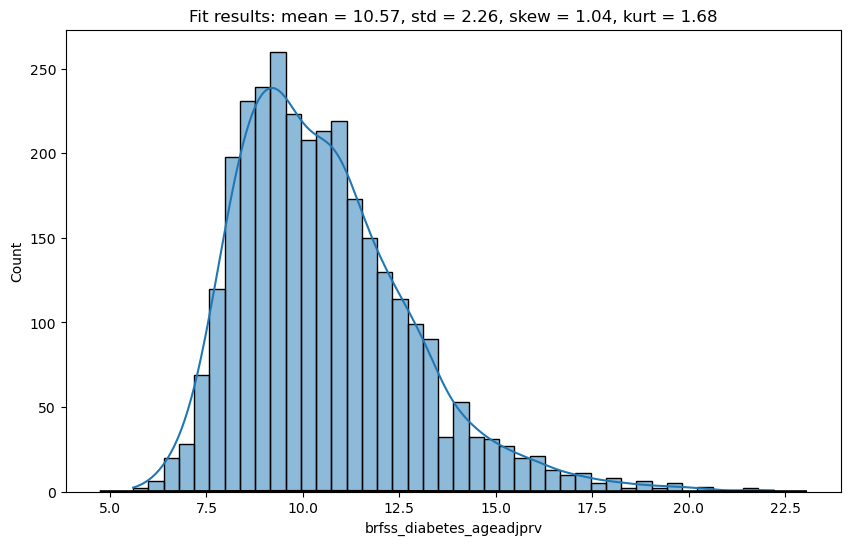

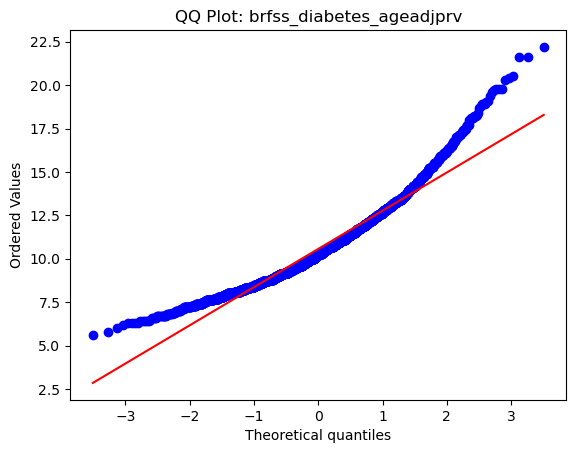

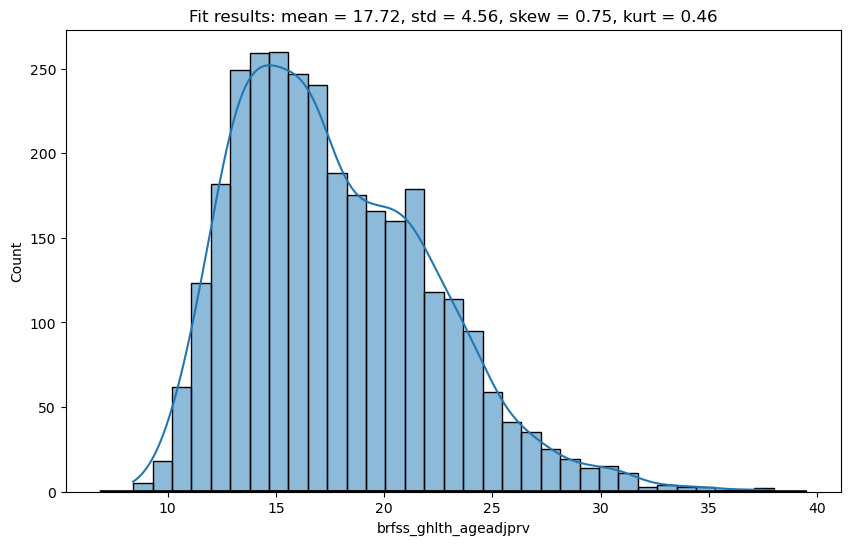

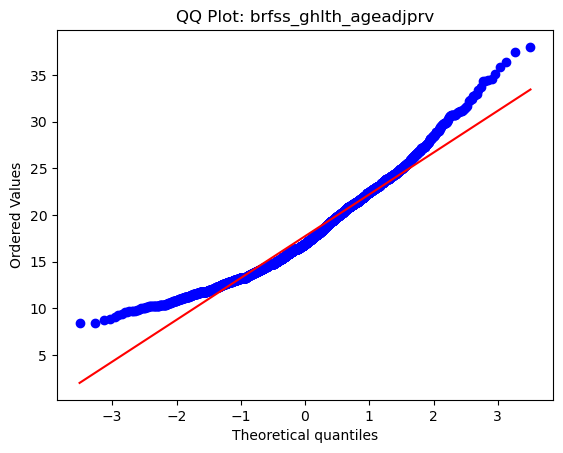

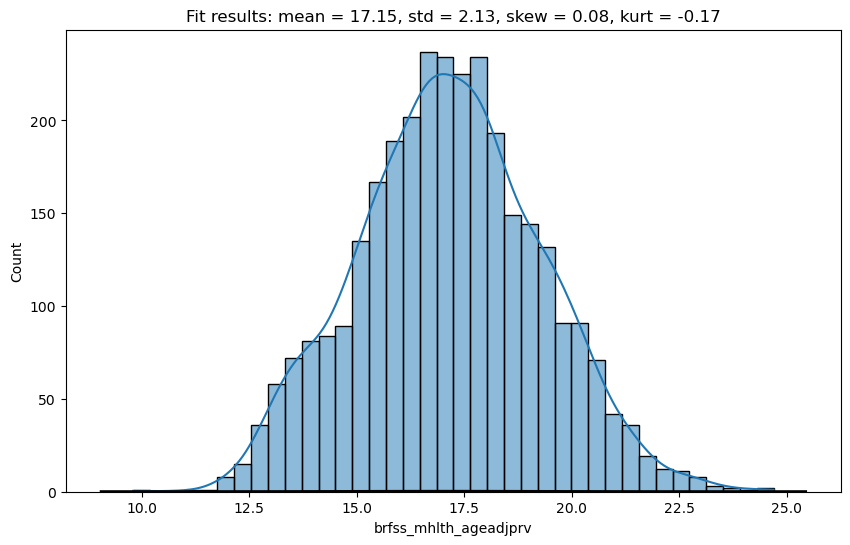

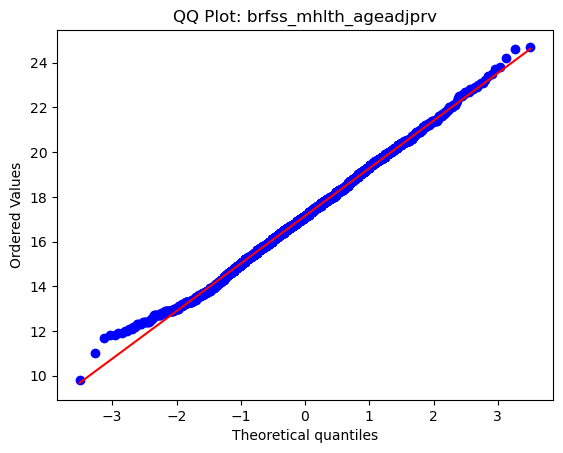

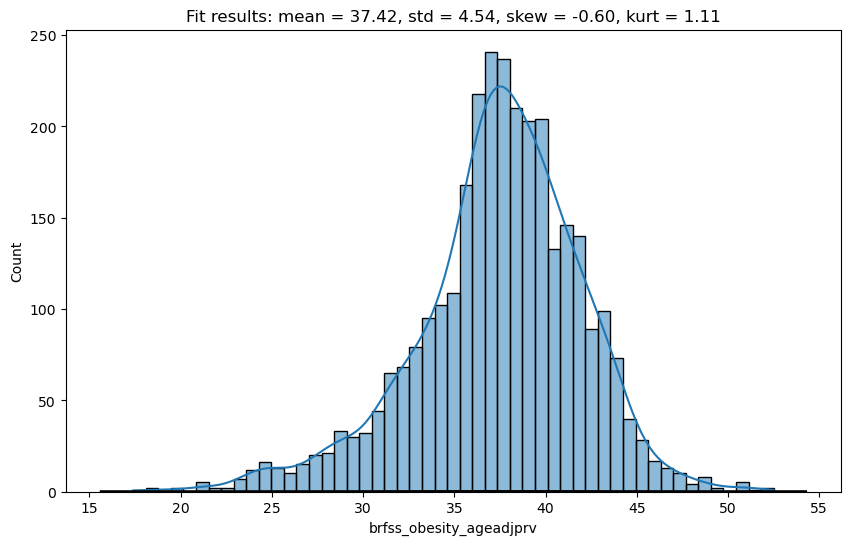

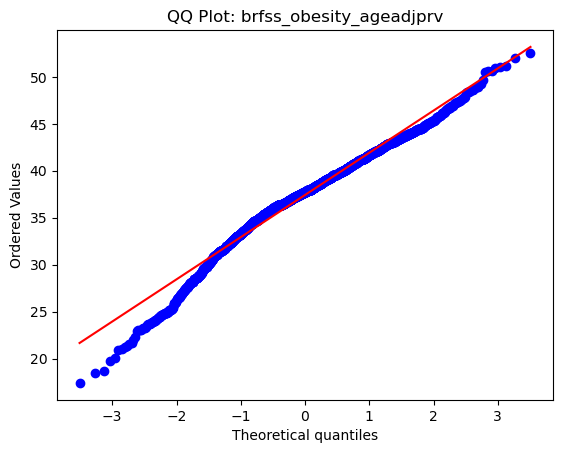

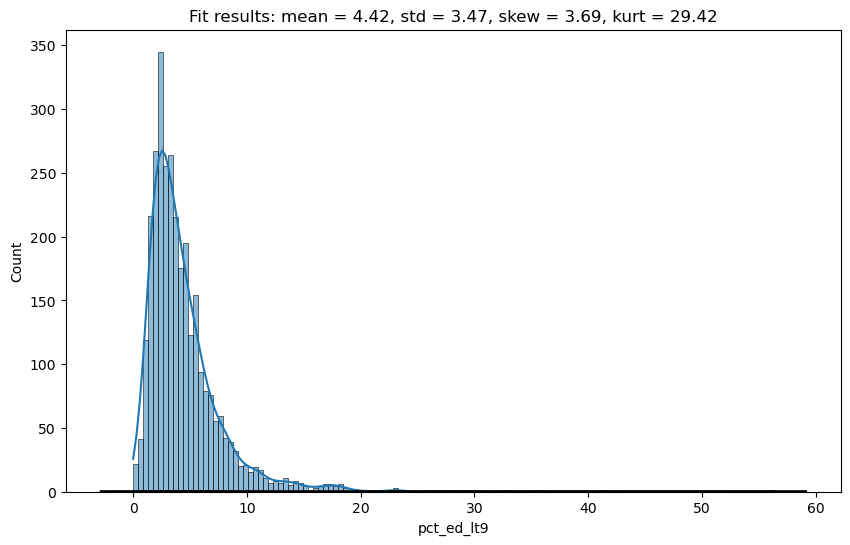

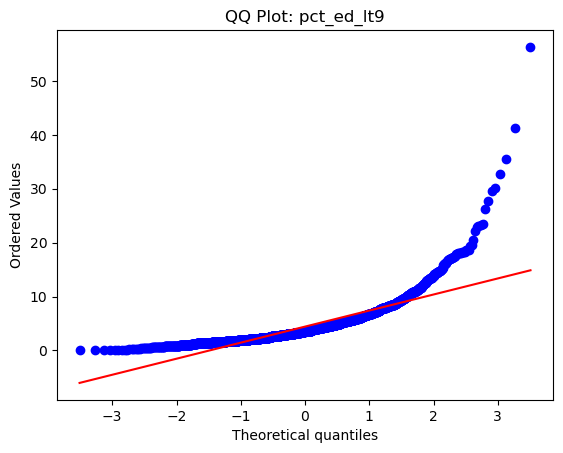

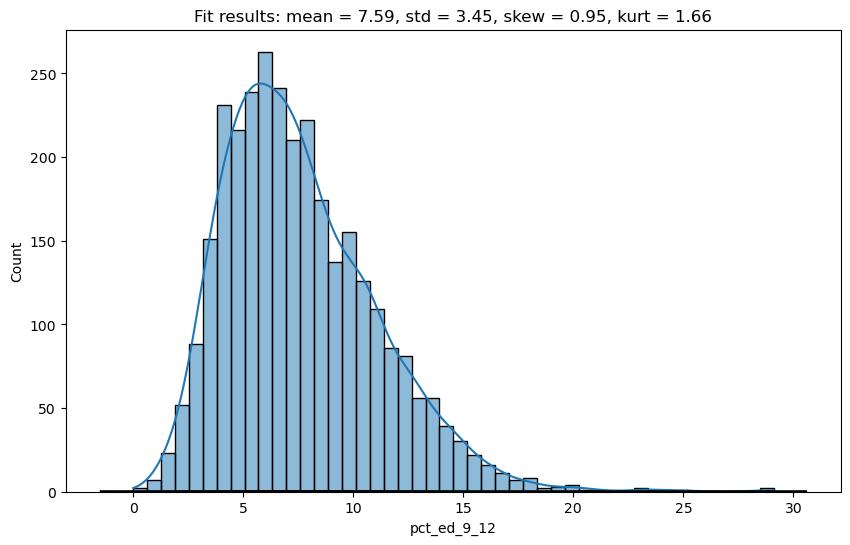

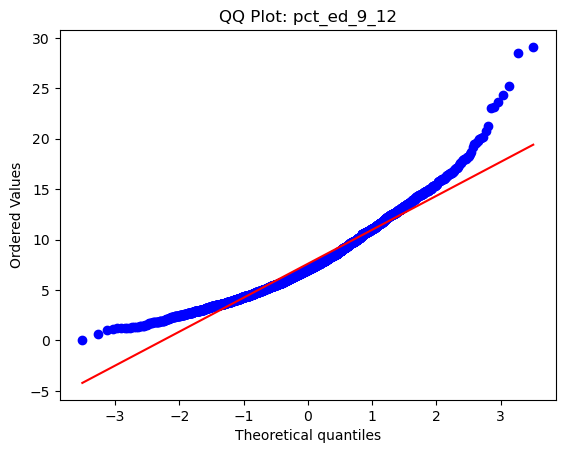

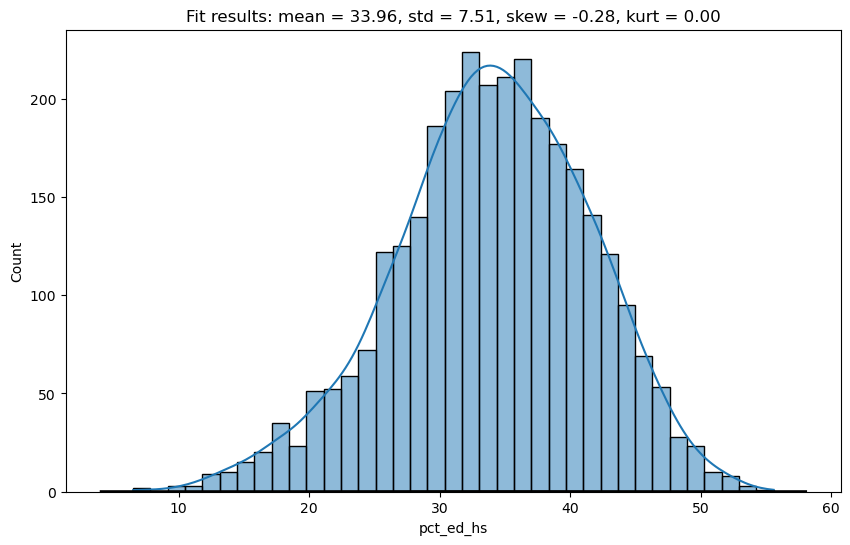

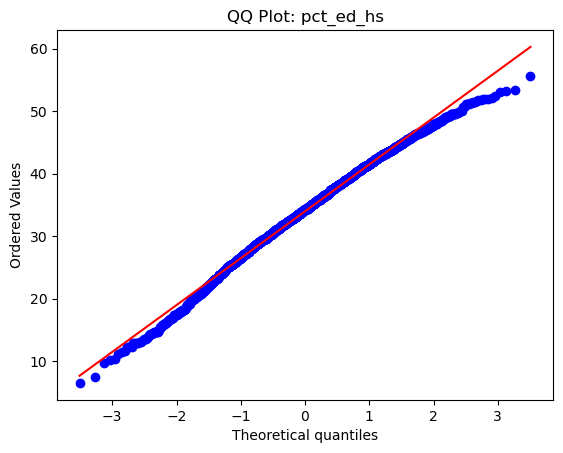

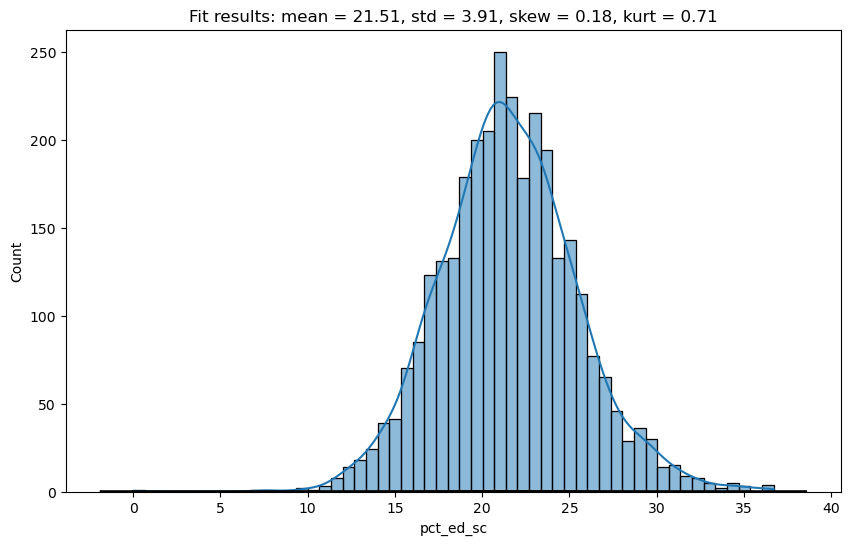

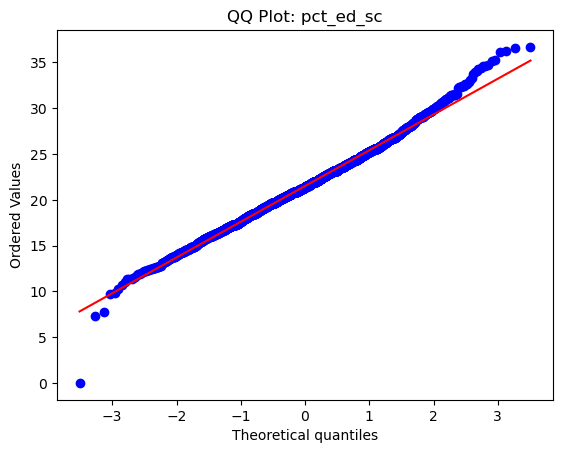

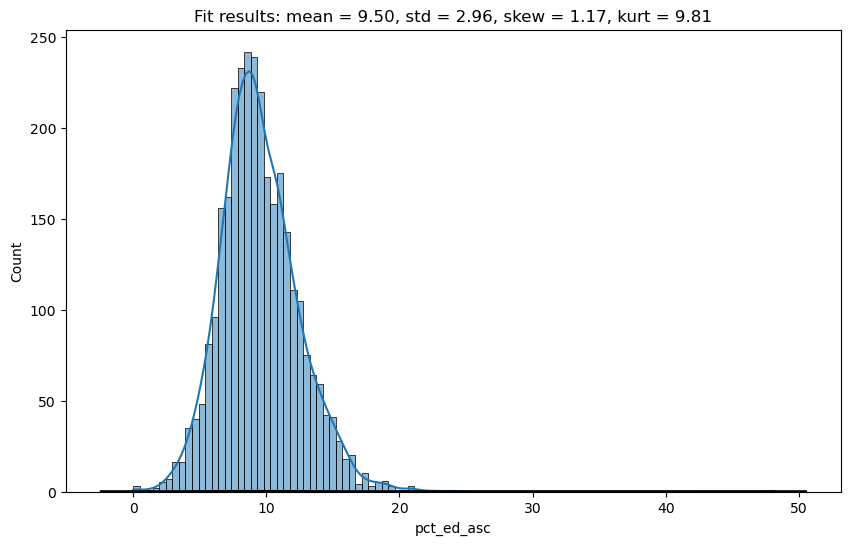

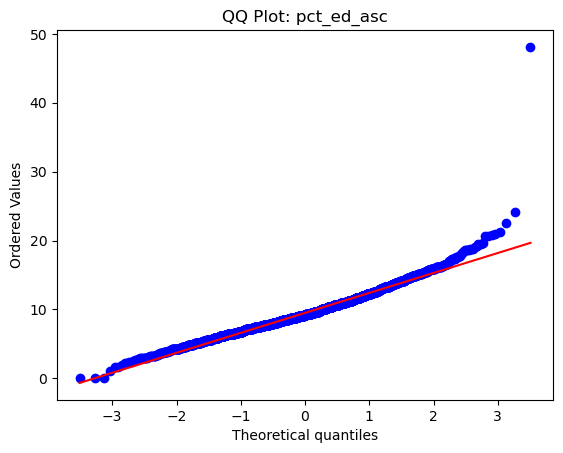

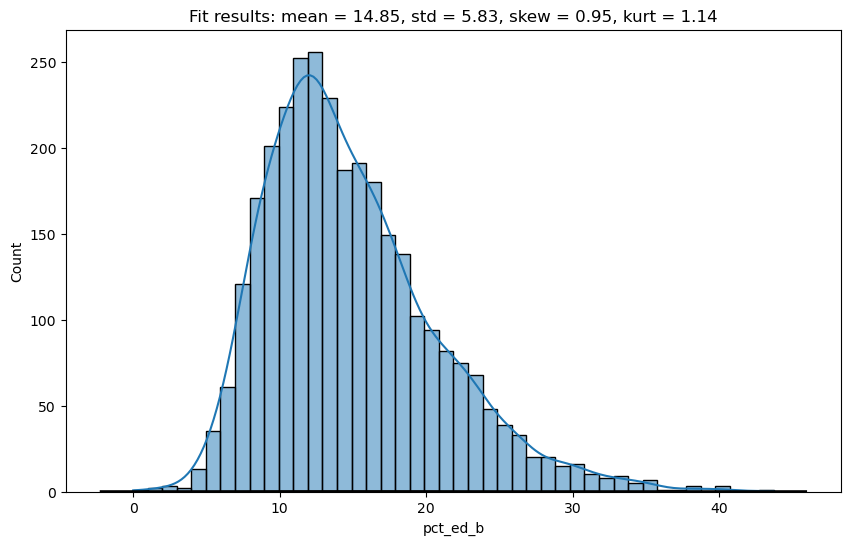

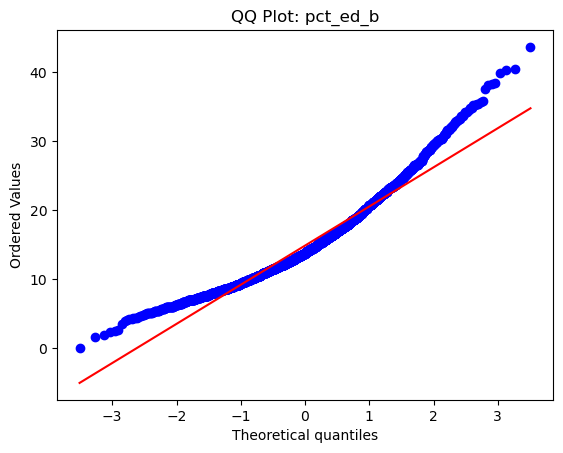

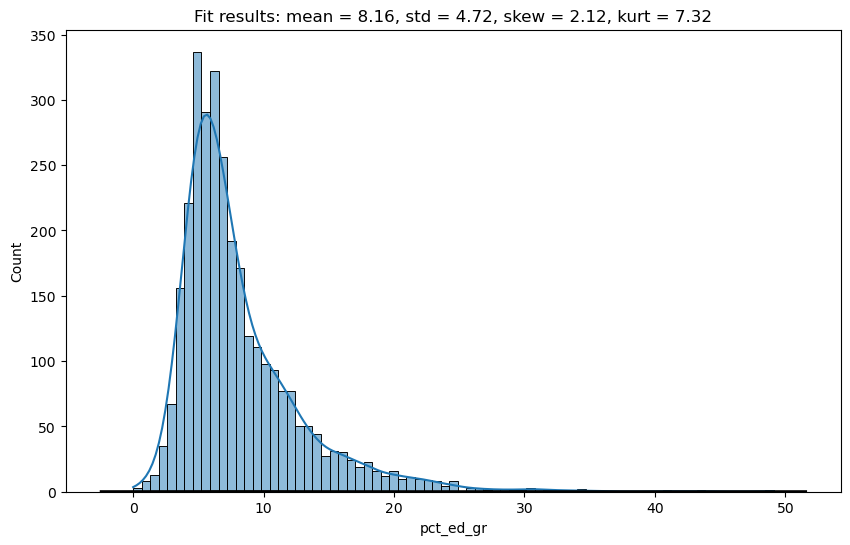

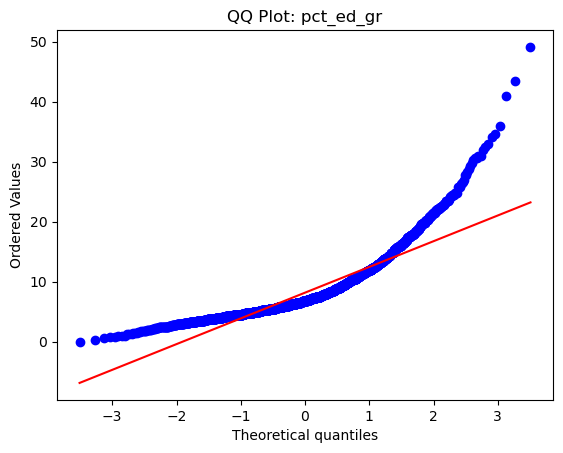

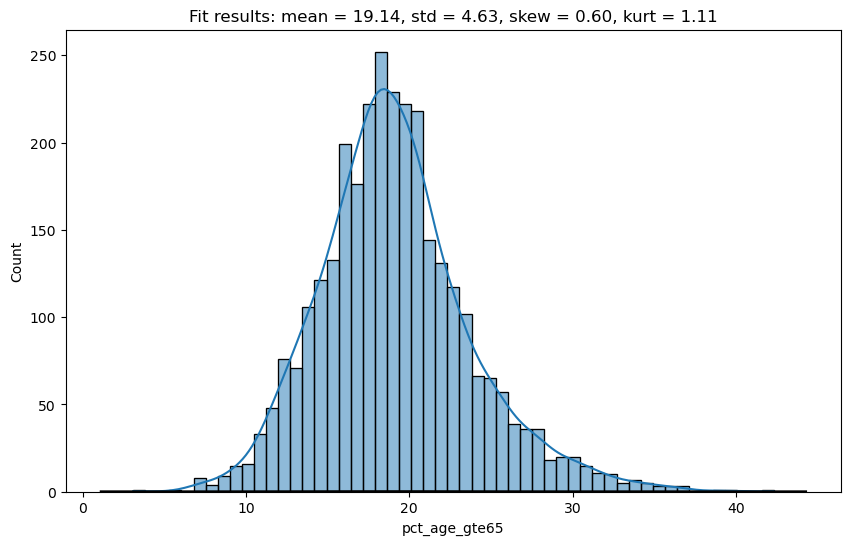

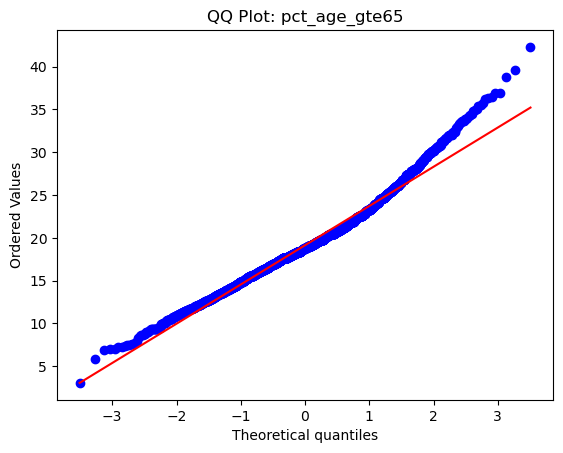

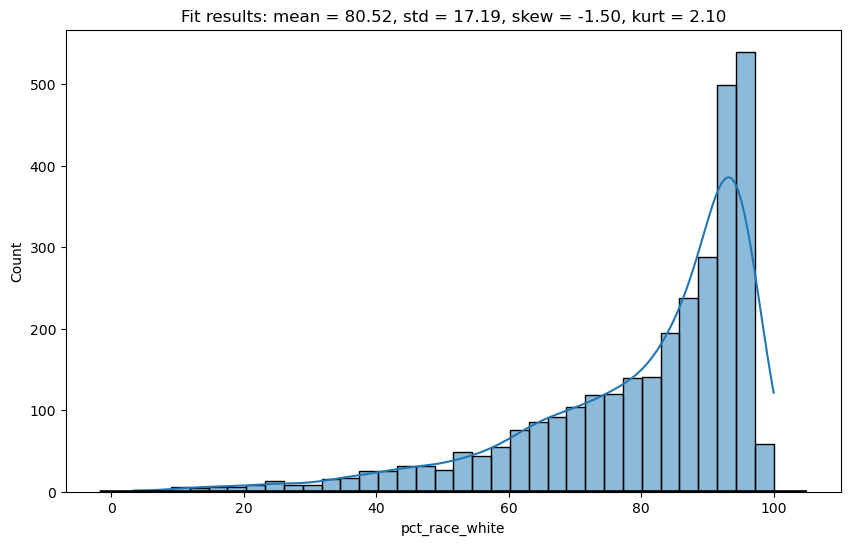

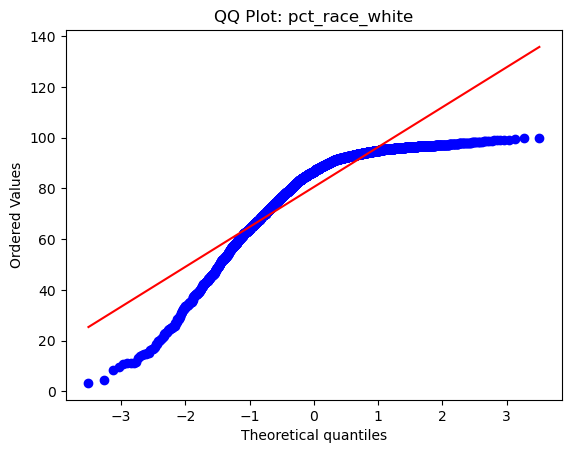

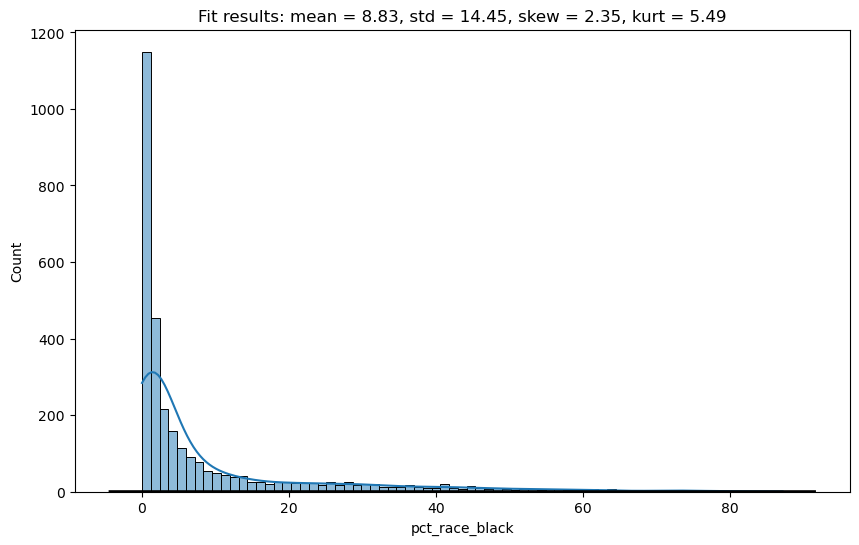

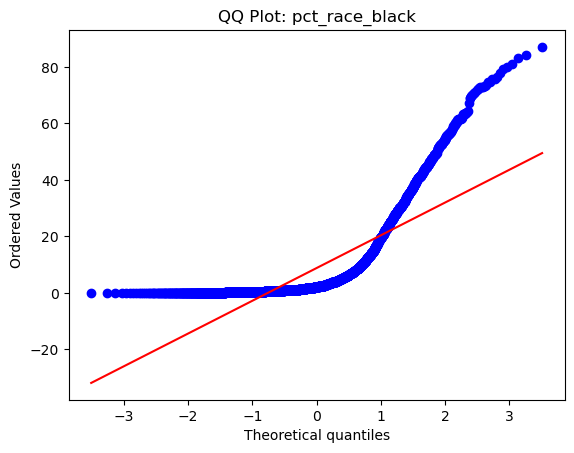

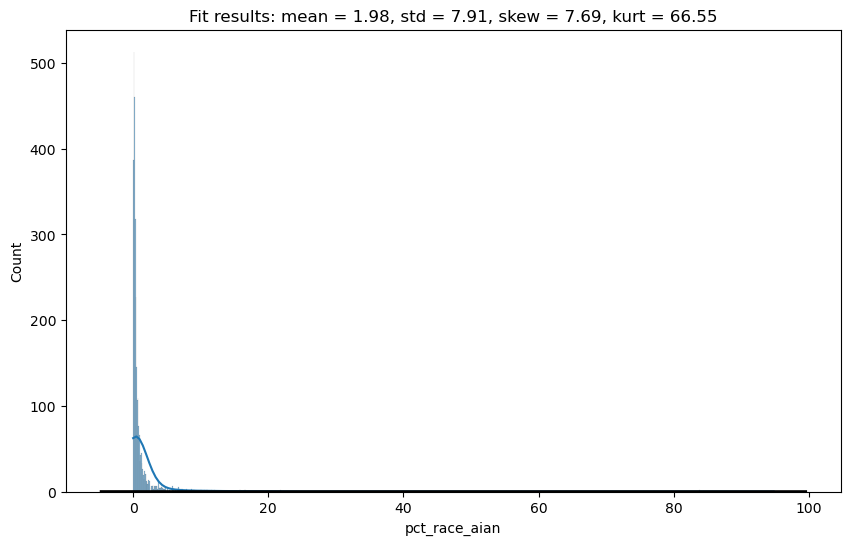

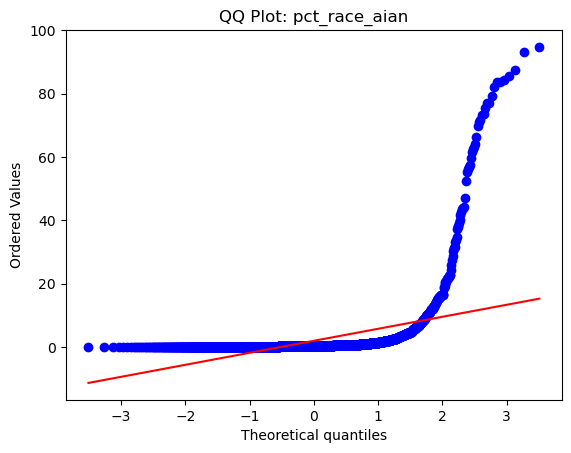

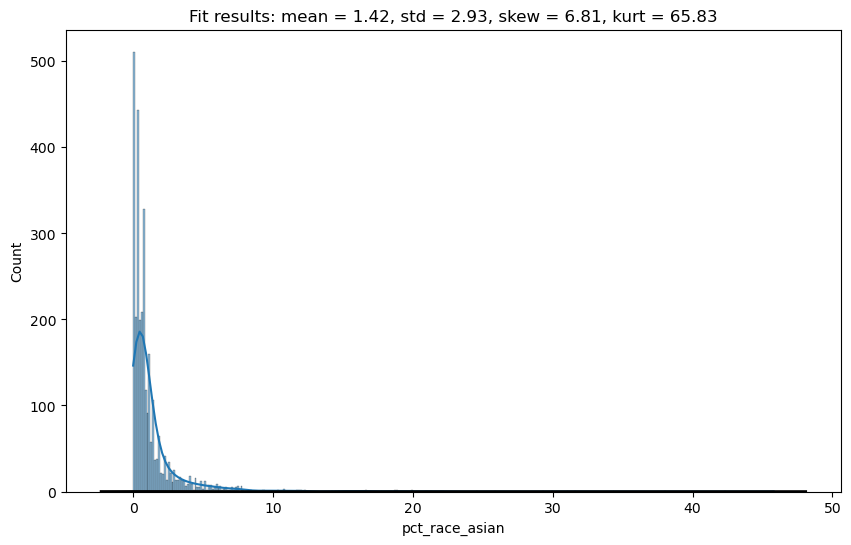

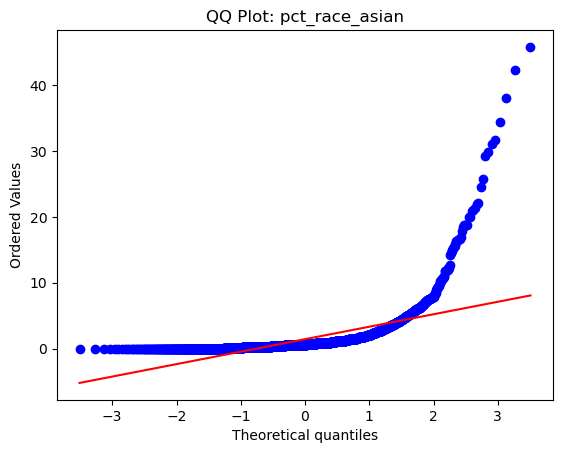

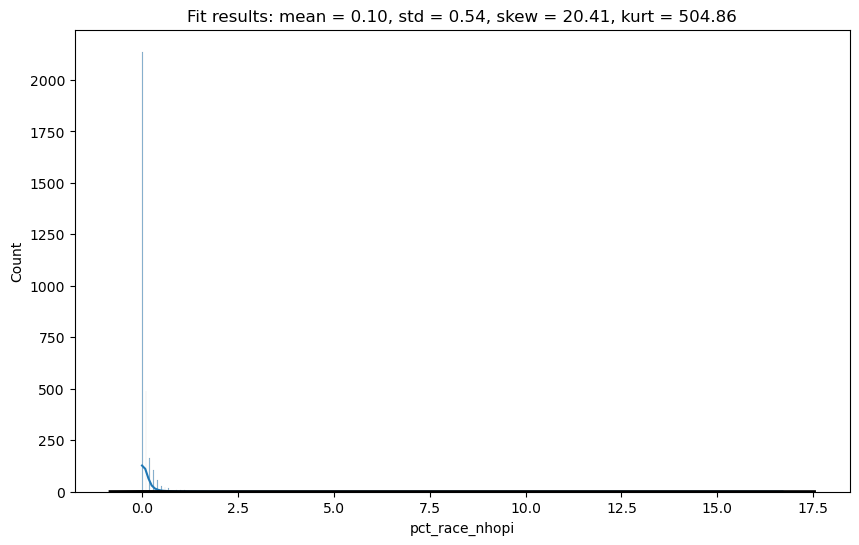

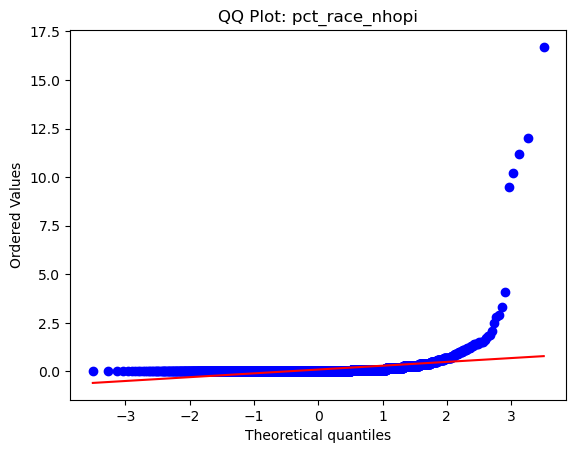

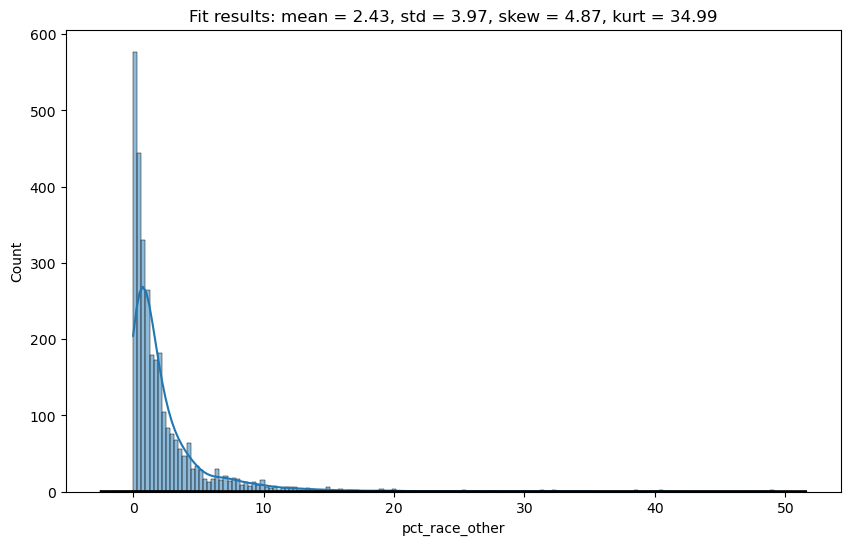

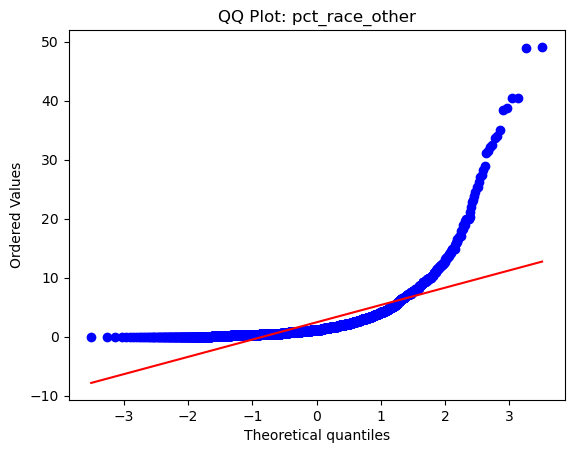

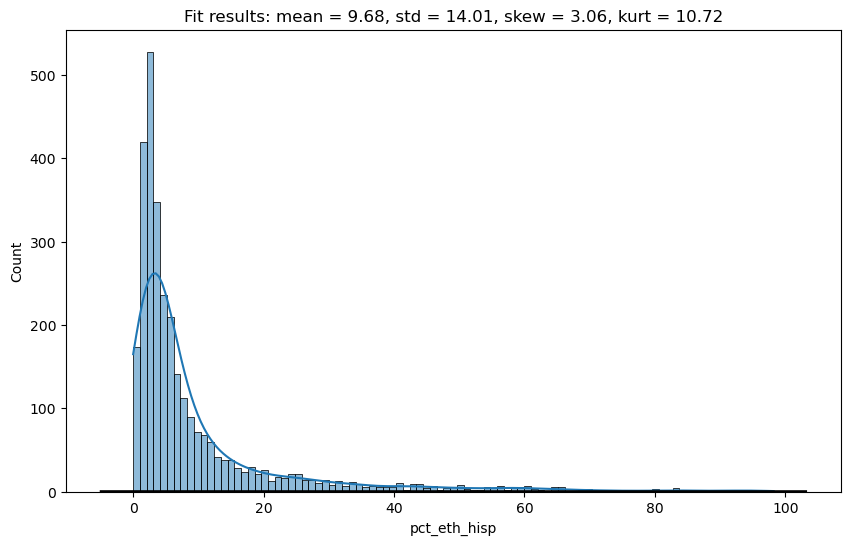

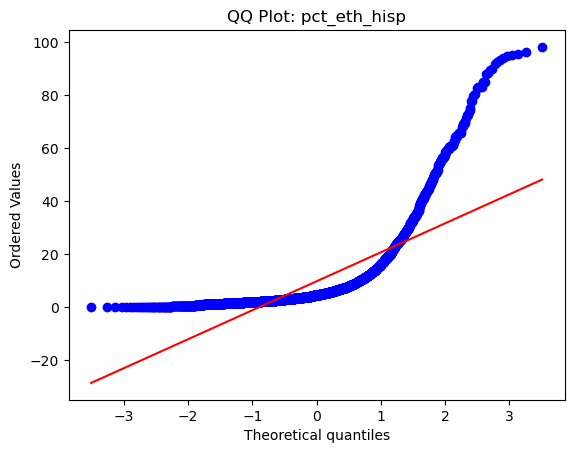

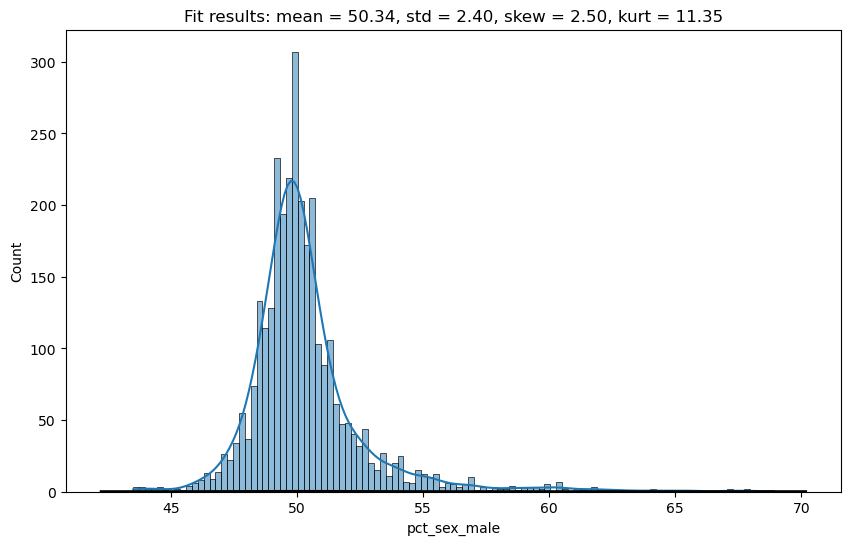

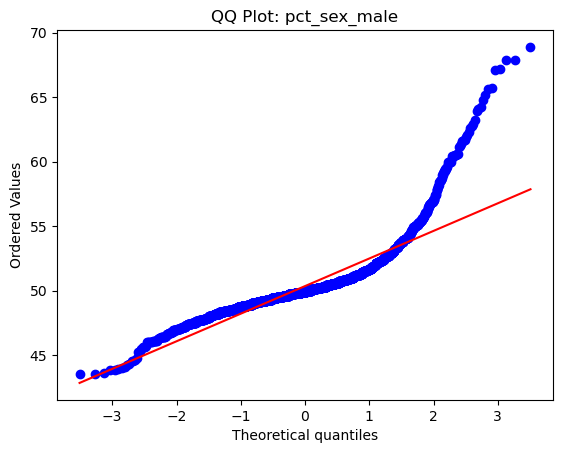

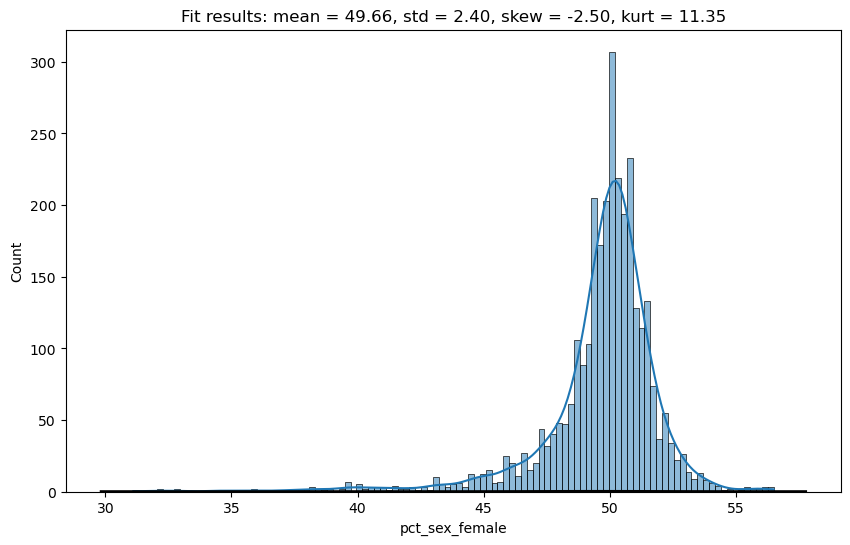

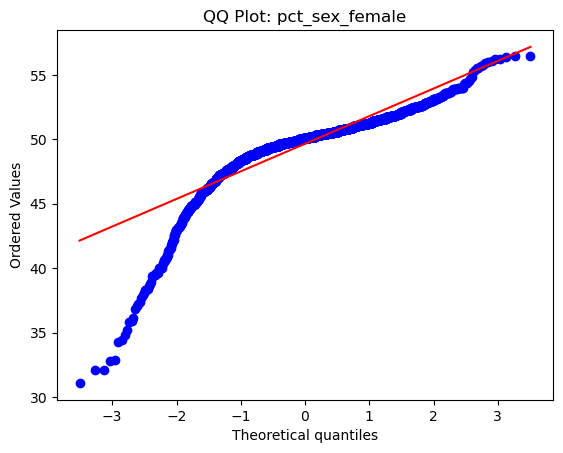

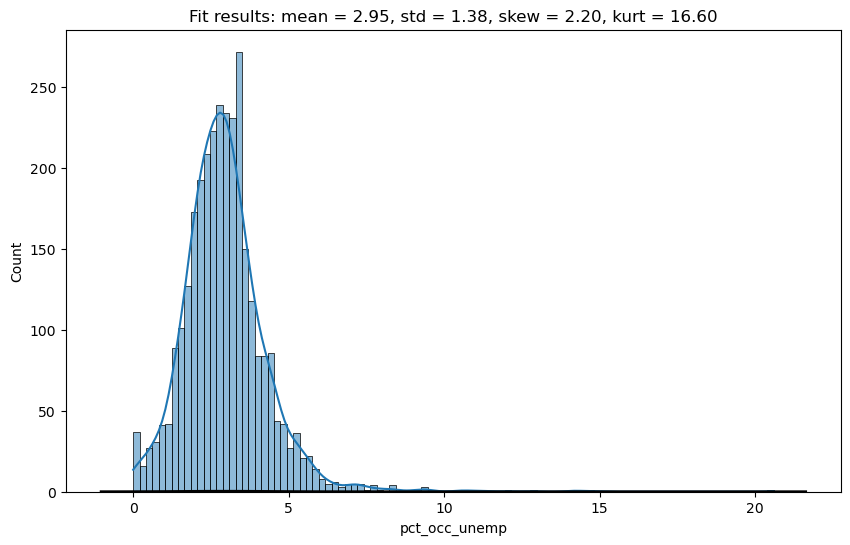

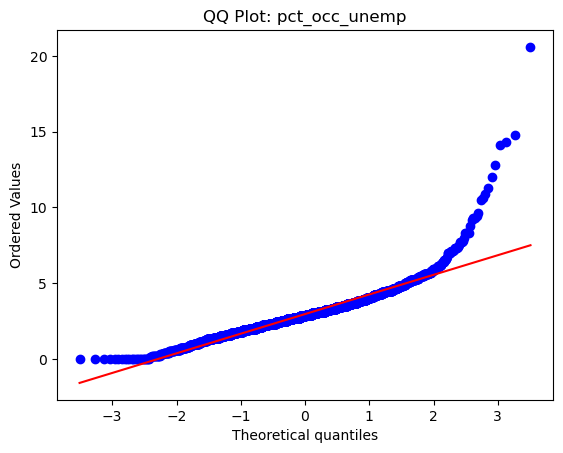

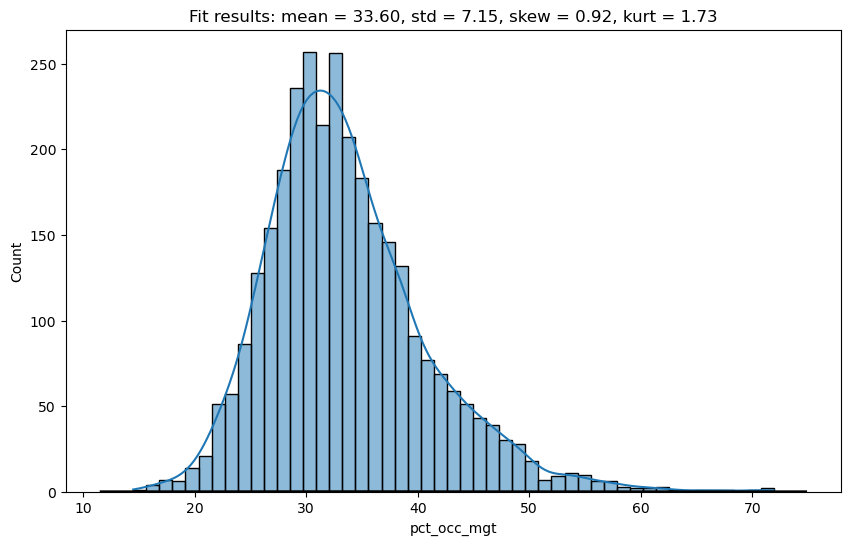

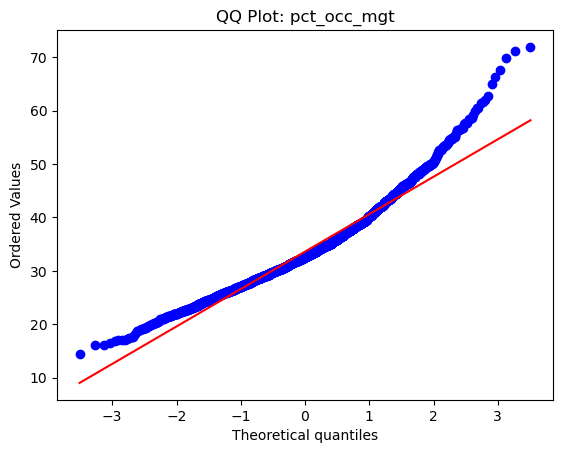

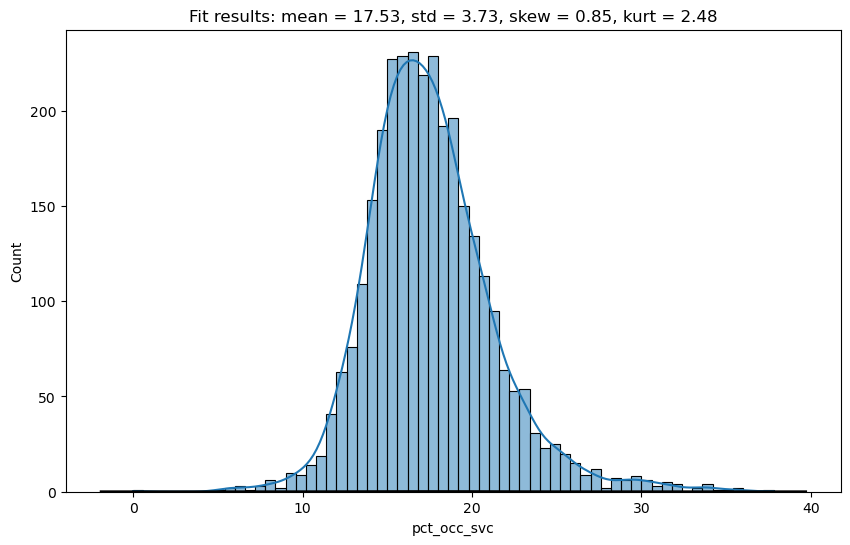

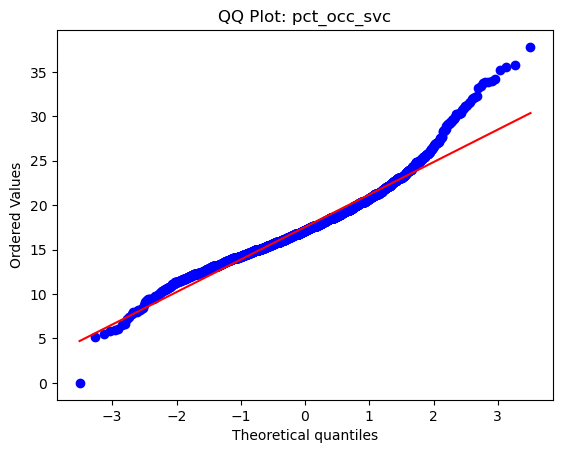

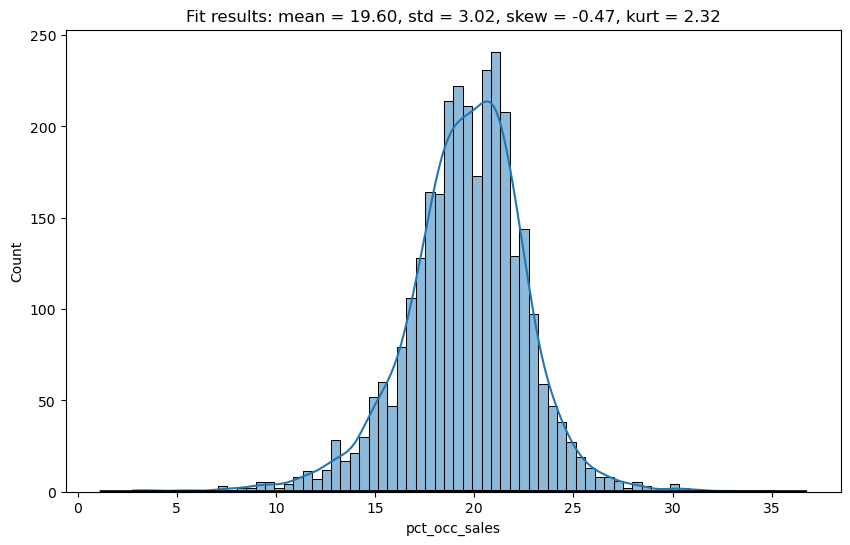

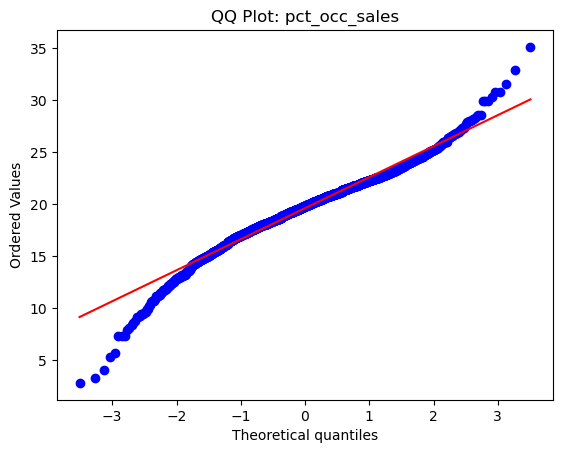

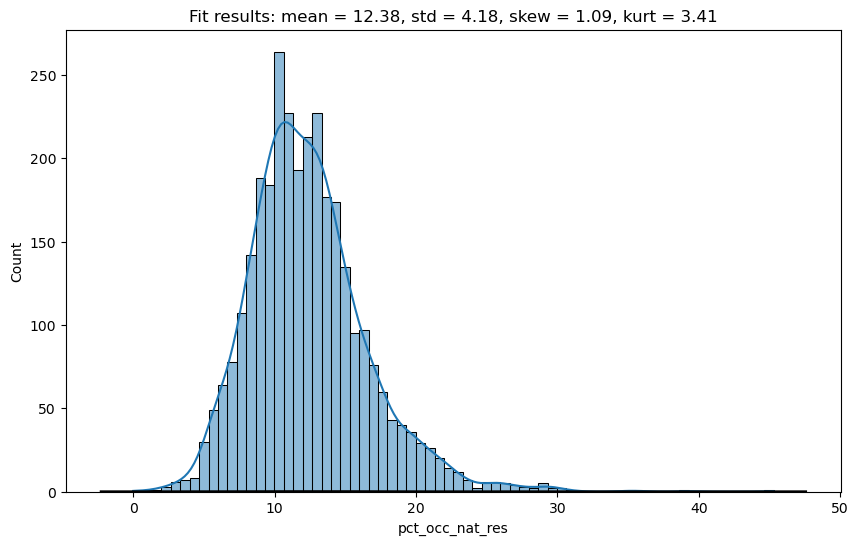

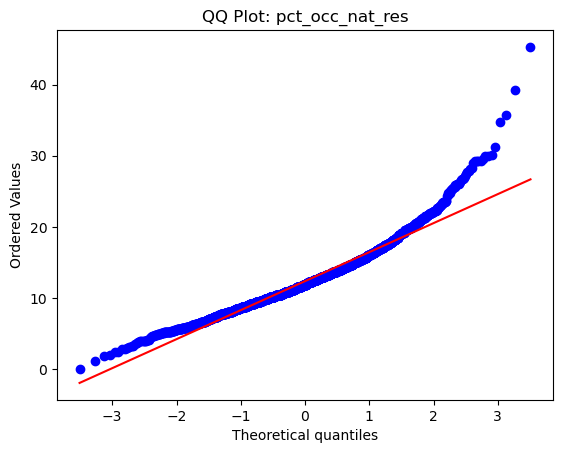

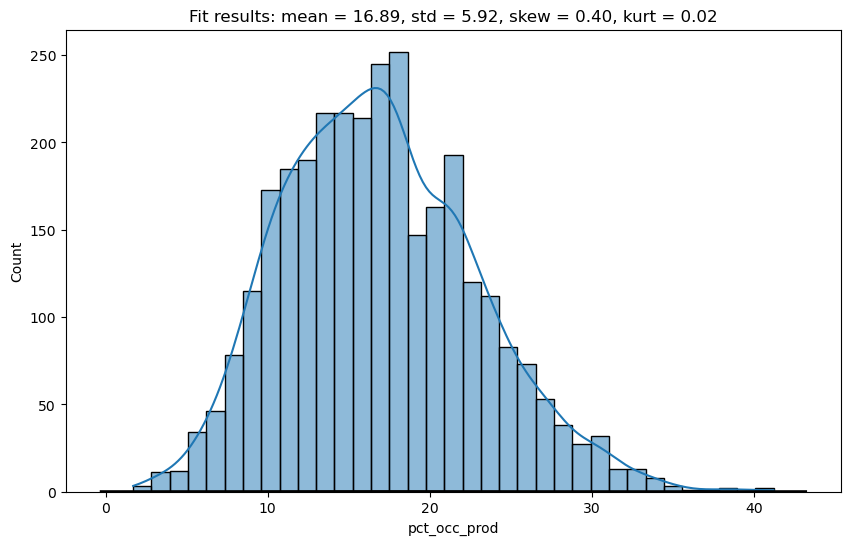

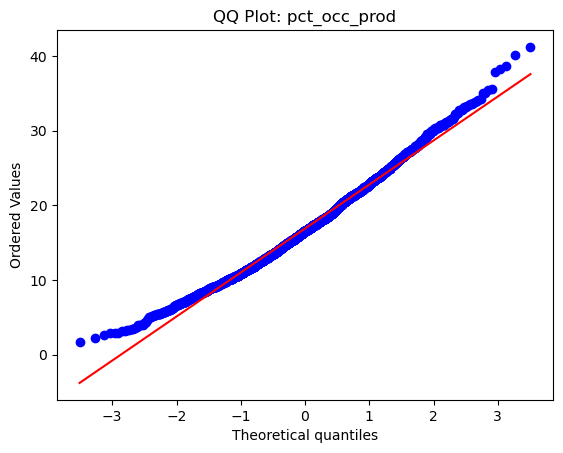

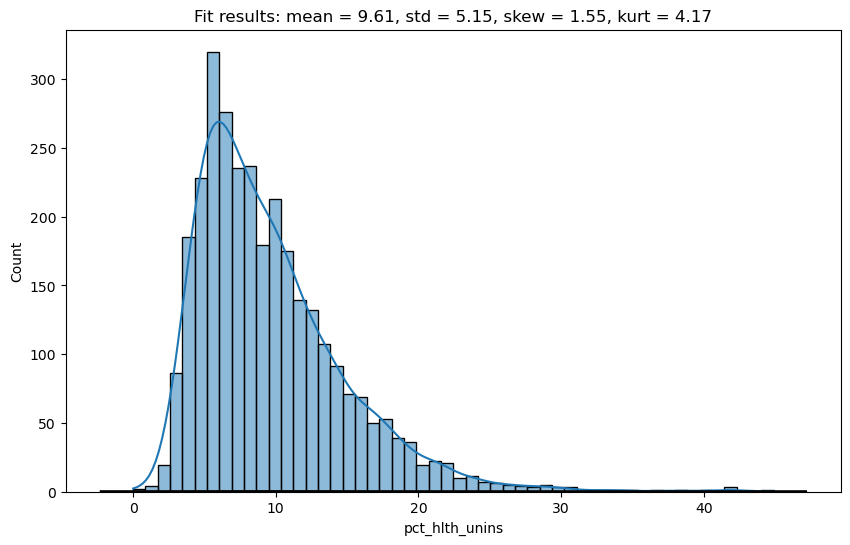

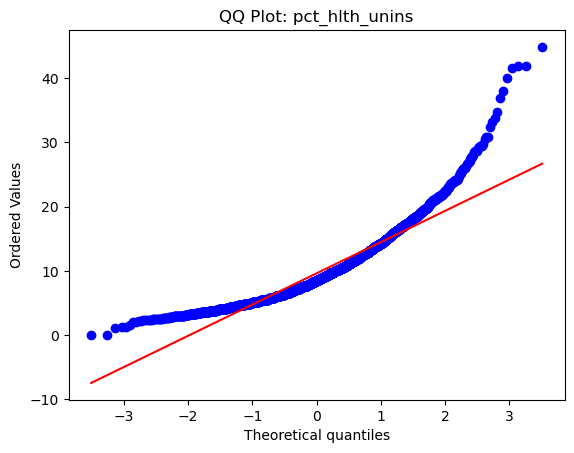

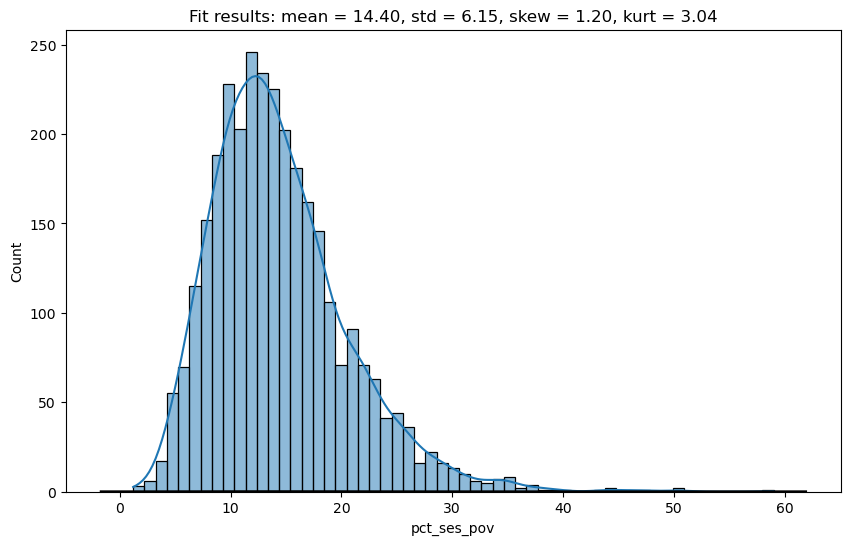

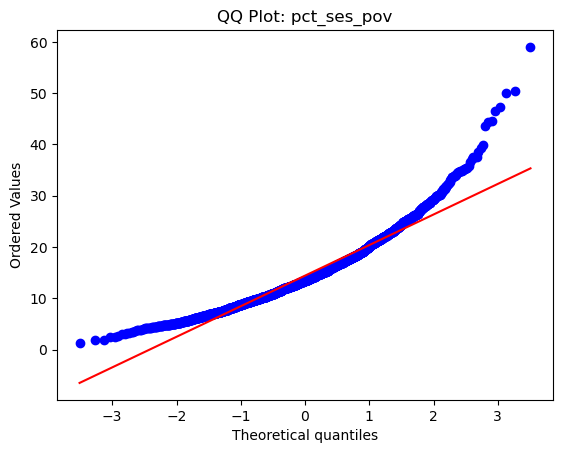

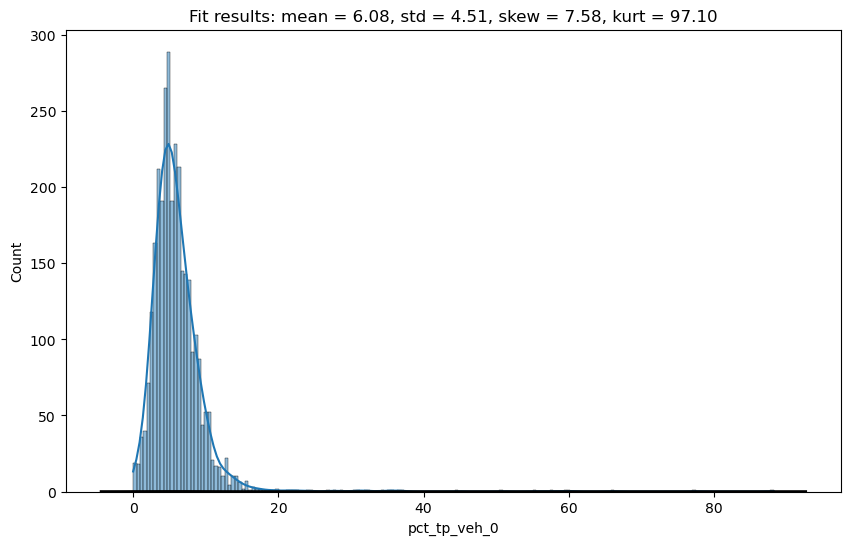

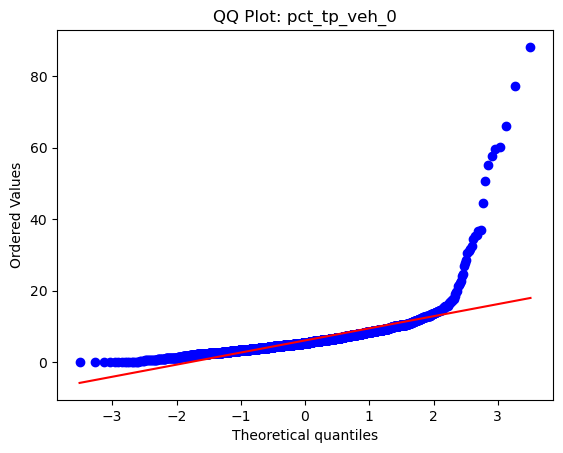

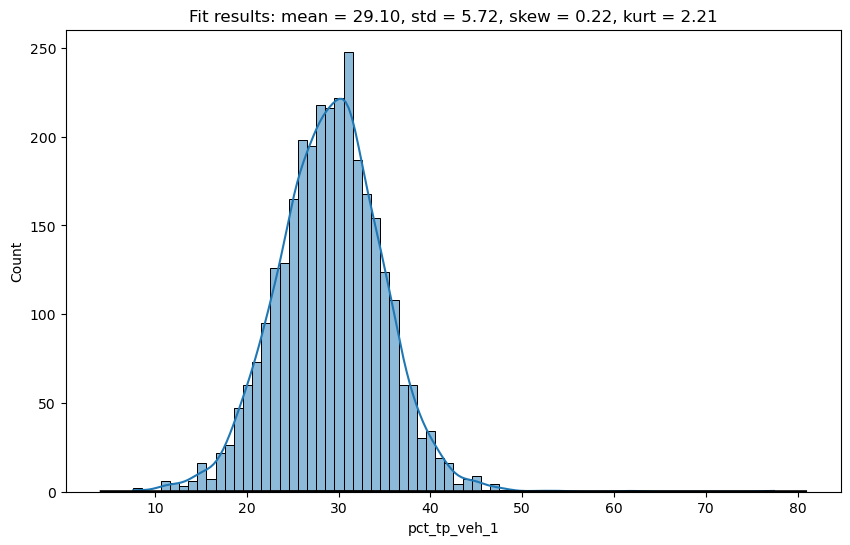

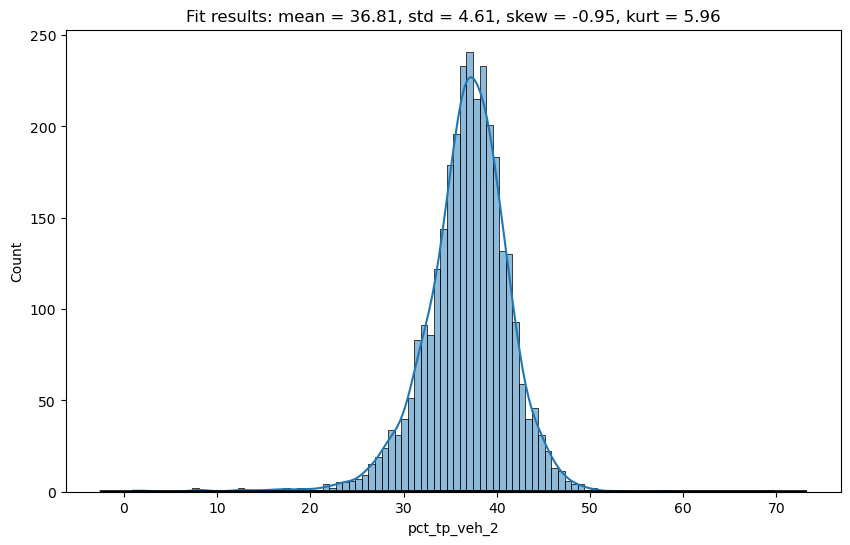

In [14]:
for i in features:
    analyze_distribution(df, i)

## Univariate Analysis - Correlation

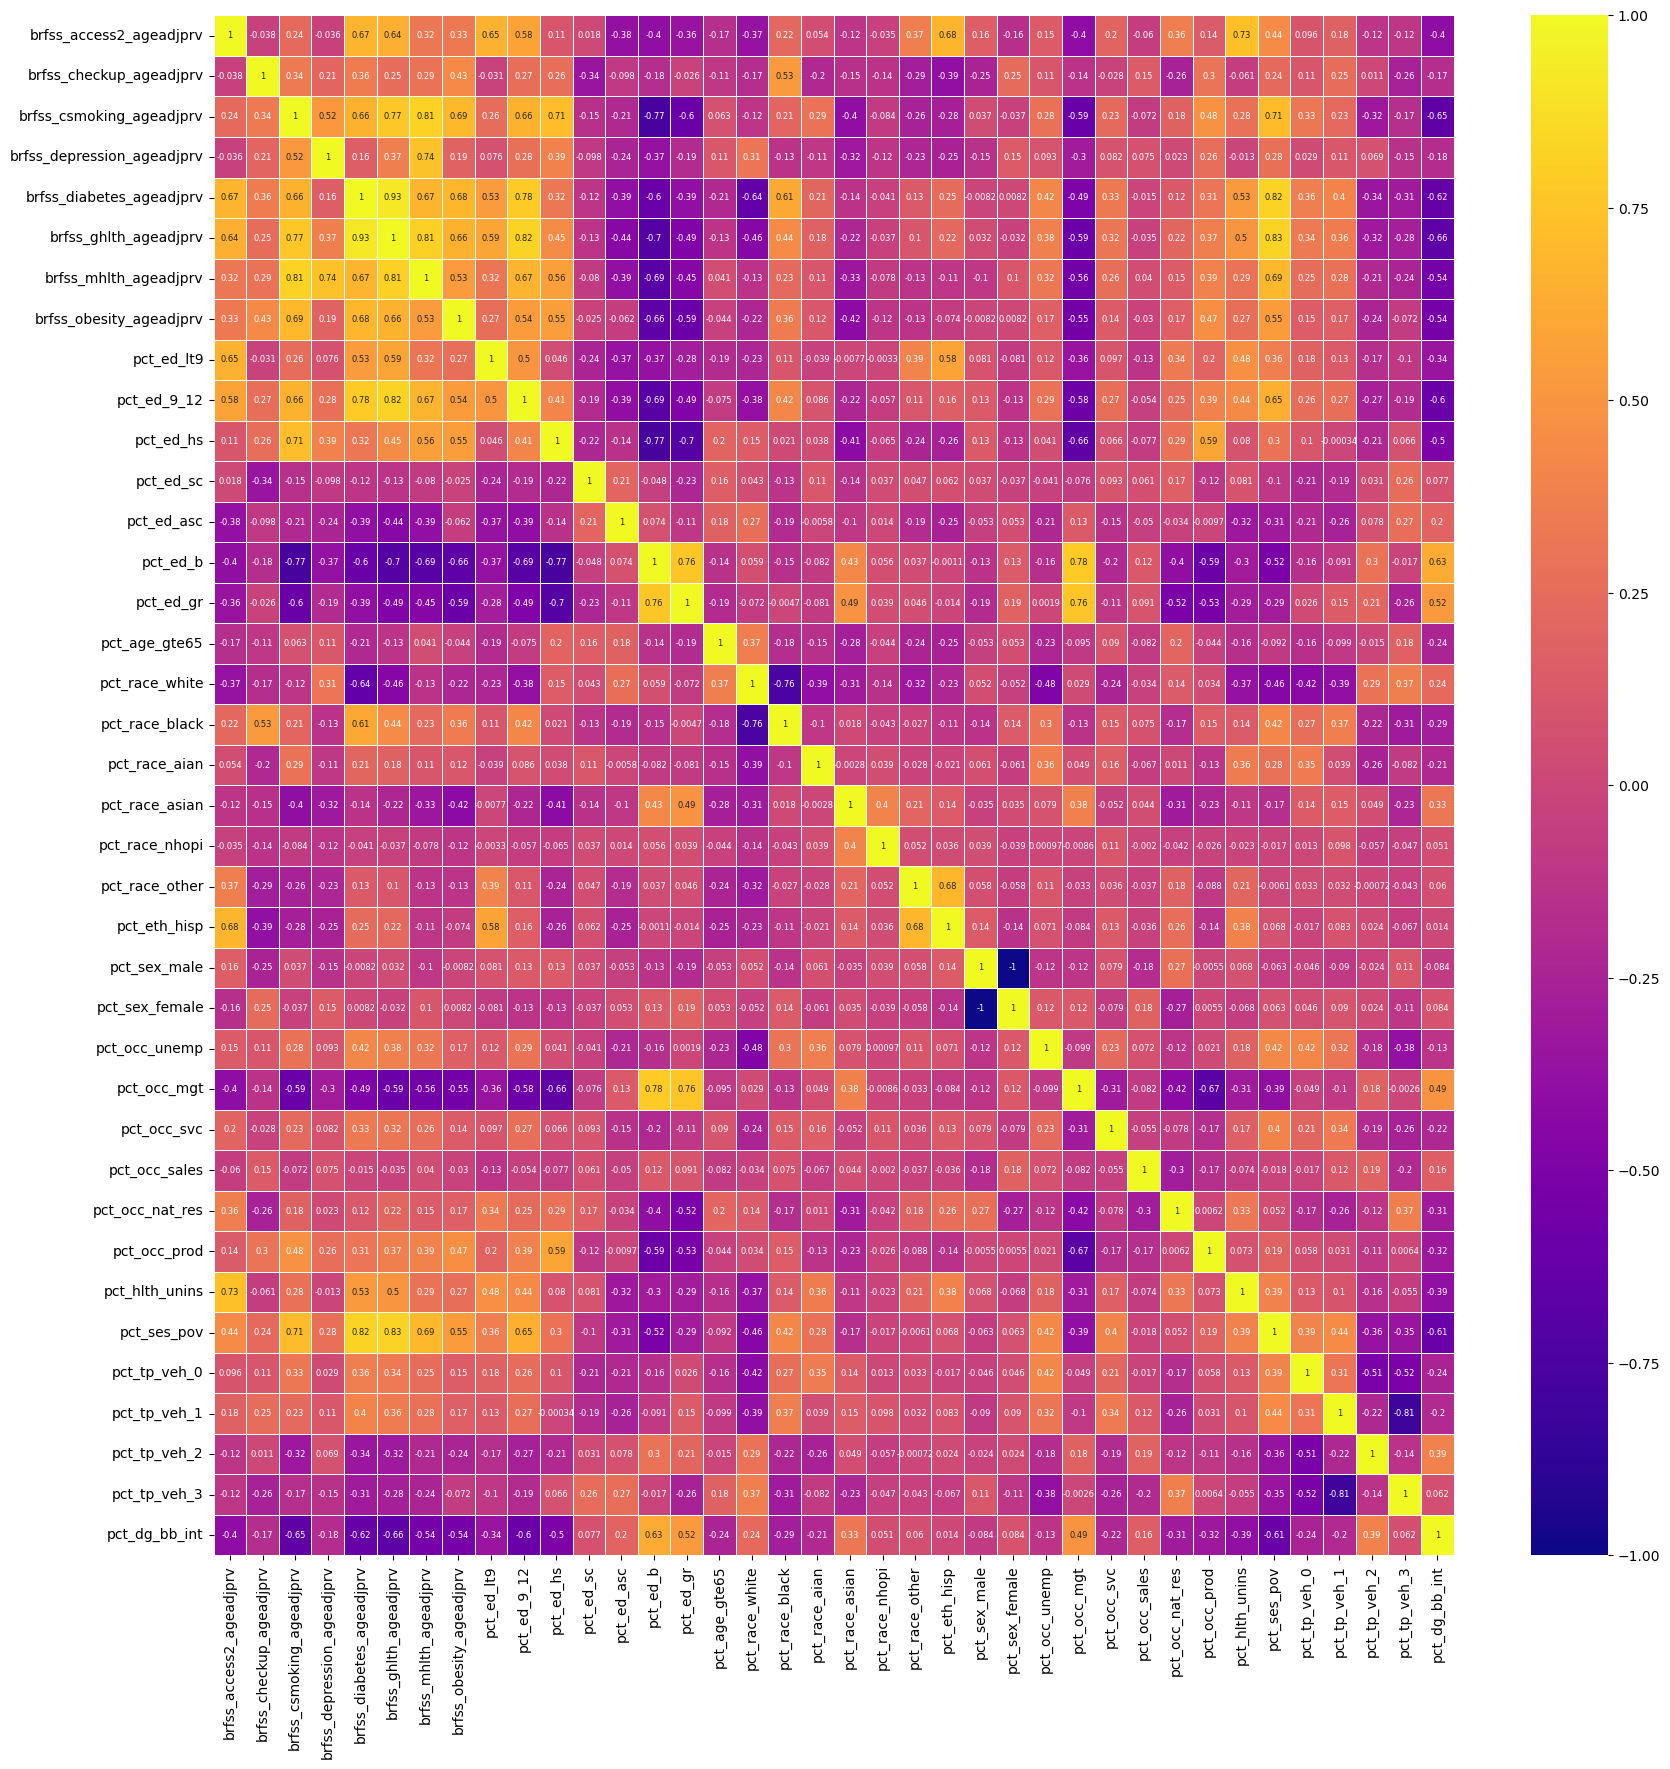

feature1                  feature2  correlation
0                 pct_eth_hisp            pct_race_other     0.682311
1      brfss_obesity_ageadjprv  brfss_diabetes_ageadjprv     0.683073
2        brfss_mhlth_ageadjprv               pct_ses_pov     0.688144
3     brfss_csmoking_ageadjprv   brfss_obesity_ageadjprv     0.692554
4     brfss_csmoking_ageadjprv               pct_ses_pov     0.710255
5                    pct_ed_hs  brfss_csmoking_ageadjprv     0.713761
6      brfss_access2_ageadjprv            pct_hlth_unins     0.730730
7   brfss_depression_ageadjprv     brfss_mhlth_ageadjprv     0.735761
8                  pct_occ_mgt                 pct_ed_gr     0.756401
9                     pct_ed_b                 pct_ed_gr     0.764301
10    brfss_csmoking_ageadjprv     brfss_ghlth_ageadjprv     0.769268
11                 pct_ed_9_12  brfss_diabetes_ageadjprv     0.776313
12                 pct_occ_mgt                  pct_ed_b     0.777645
13       brfss_ghlth_ageadjprv     brfss_mhlth_ageadjprv     0.812276
14    brfss_csmoking_ageadjprv     brfss_mhlth_ageadjprv     0.813041
15                 pct_ed_9_12     brfss_ghlth_ageadjprv     0.820532
16    brfss_diabetes_ageadjprv               pct_ses_pov     0.824549
17                 pct_ses_pov     brfss_ghlth_ageadjprv     0.827998
18    brfss_diabetes_ageadjprv     brfss_ghlth_ageadjprv     0.927572
19                pct_sex_male            pct_sex_female    -1.000000
20                pct_tp_veh_3              pct_tp_veh_1    -0.807292
21                    pct_ed_b  brfss_csmoking_ageadjprv    -0.771570
22                    pct_ed_b                 pct_ed_hs    -0.770391
23              pct_race_black            pct_race_white    -0.757329
24                    pct_ed_b     brfss_ghlth_ageadjprv    -0.704377
25                   pct_ed_hs                 pct_ed_gr    -0.701566
26                 pct_ed_9_12                  pct_ed_b    -0.689861
27       brfss_mhlth_ageadjprv                  pct_ed_b    -0.689738
28                pct_occ_prod               pct_occ_mgt    -0.670625
29                    pct_ed_b   brfss_obesity_ageadjprv    -0.662791
30               pct_dg_bb_int     brfss_ghlth_ageadjprv    -0.662506
31                 pct_occ_mgt                 pct_ed_hs    -0.655527
32               pct_dg_bb_int  brfss_csmoking_ageadjprv    -0.653152
33    brfss_diabetes_ageadjprv            pct_race_white    -0.640247
34    brfss_diabetes_ageadjprv             pct_dg_bb_int    -0.620441
35                 pct_ses_pov             pct_dg_bb_int    -0.606104
36    brfss_csmoking_ageadjprv                 pct_ed_gr    -0.599543
37                 pct_ed_9_12             pct_dg_bb_int    -0.598564

In [15]:
corr = df[features].corr(numeric_only=True)
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap='plasma', linewidths=0.5, annot_kws={'size': 6})
plt.show()

corr = corr.unstack().sort_values(kind='quicksort').drop_duplicates()
top = corr[-20:-1]
bottom = corr[0:19]
top_bottom = pd.concat([top, bottom])
top_bottom = top_bottom.reset_index()
top_bottom.columns = ['feature1', 'feature2', 'correlation']
top_bottom

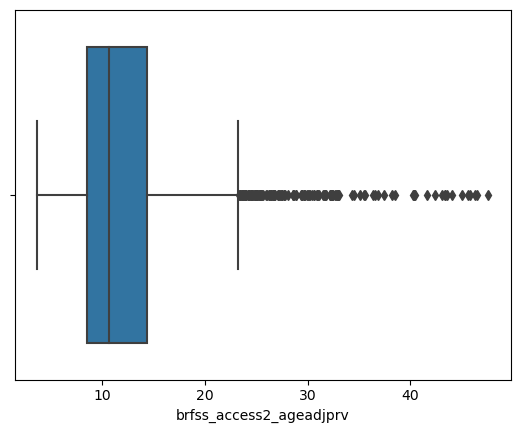

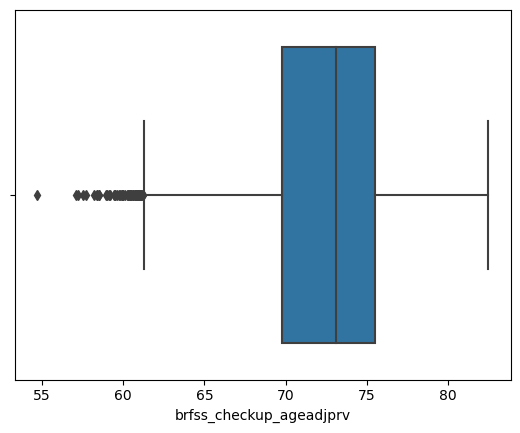

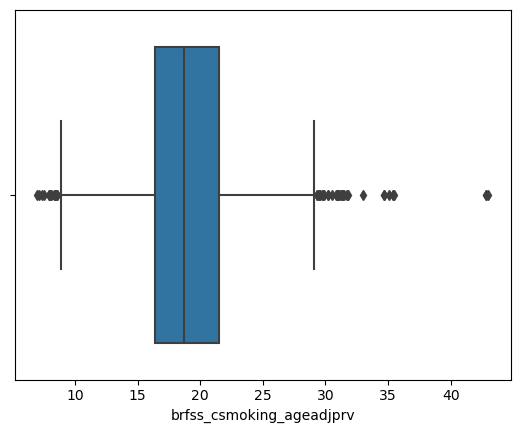

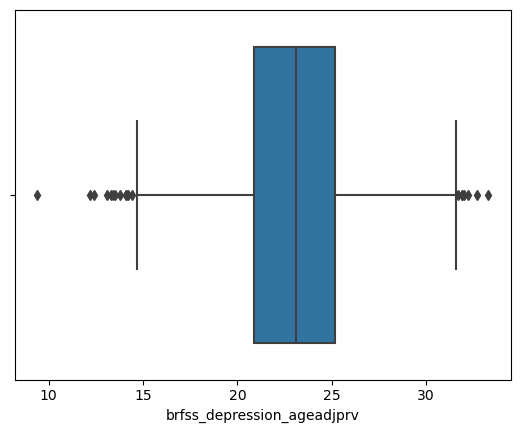

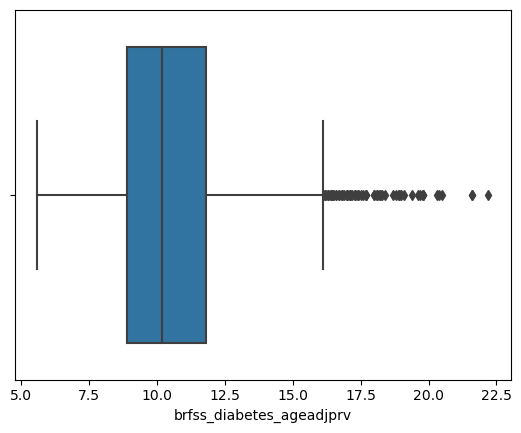

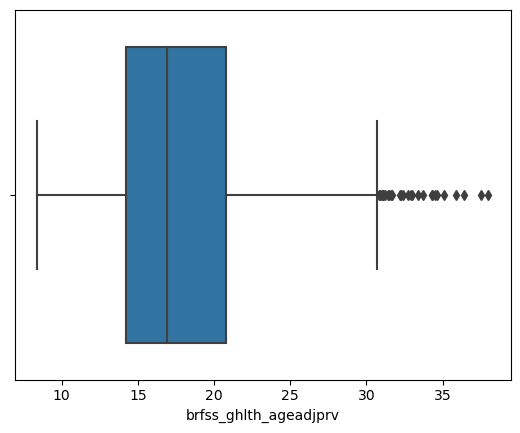

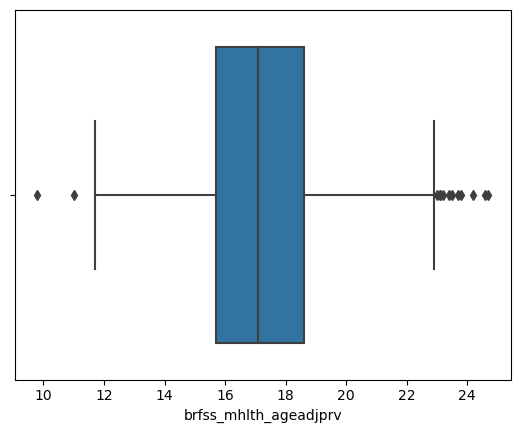

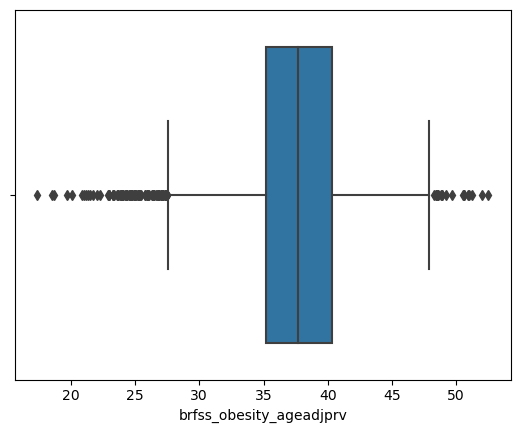

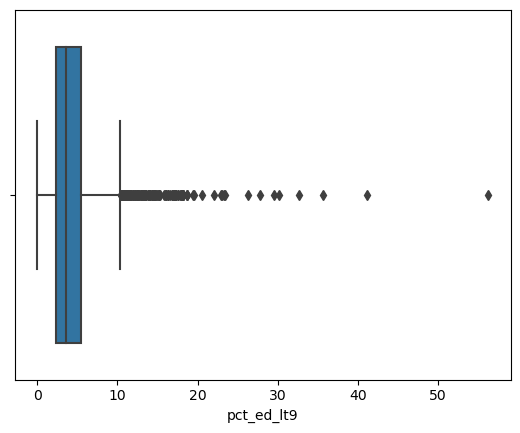

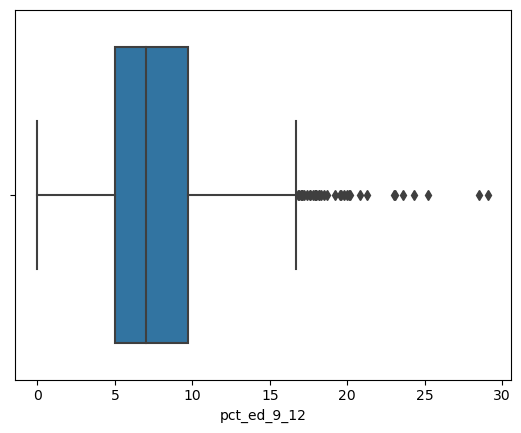

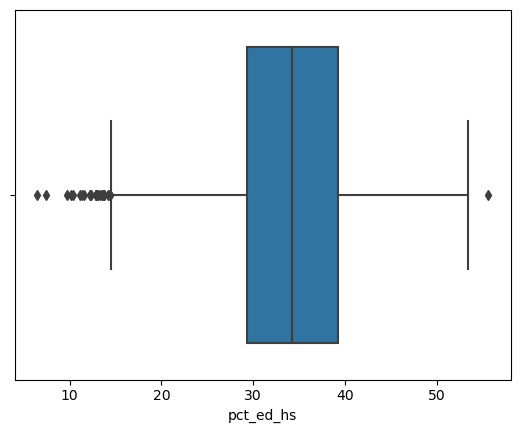

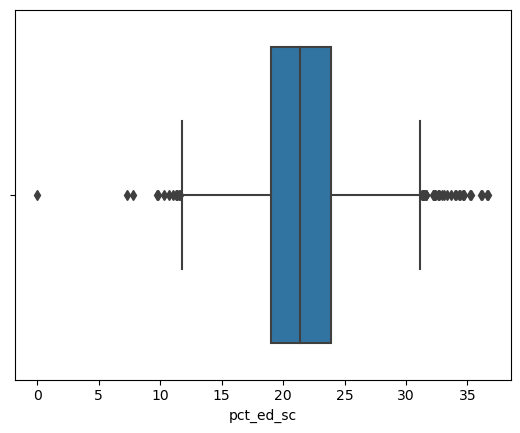

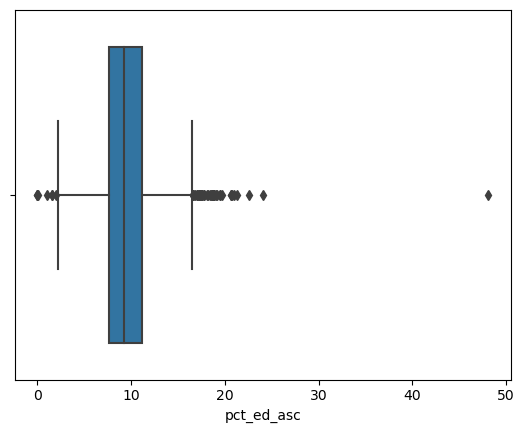

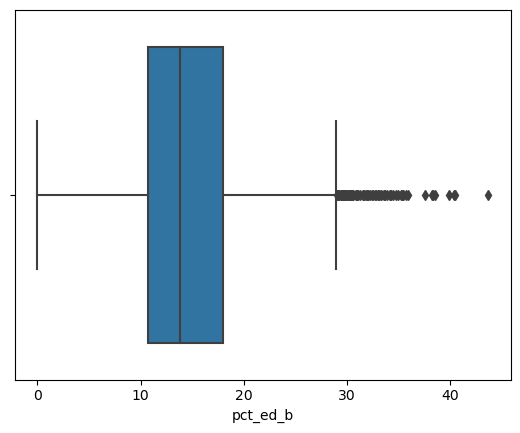

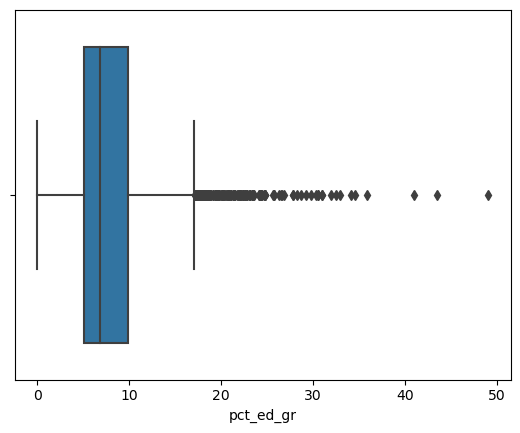

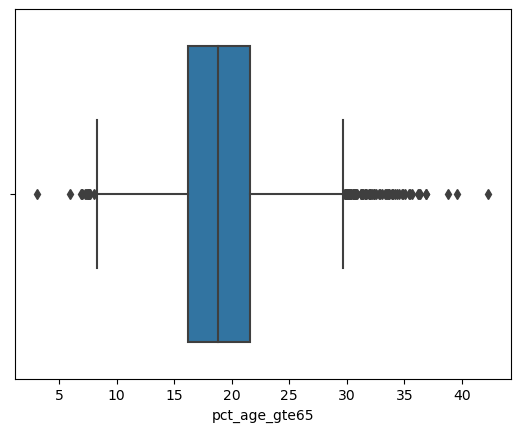

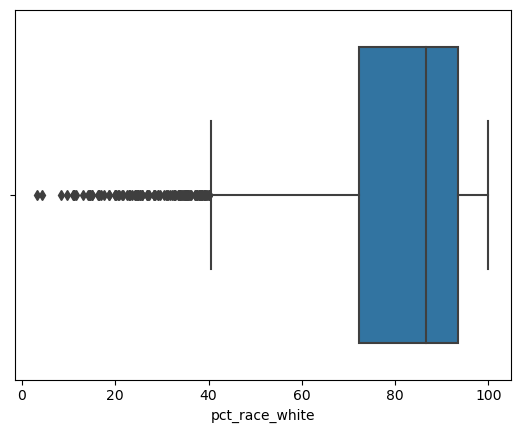

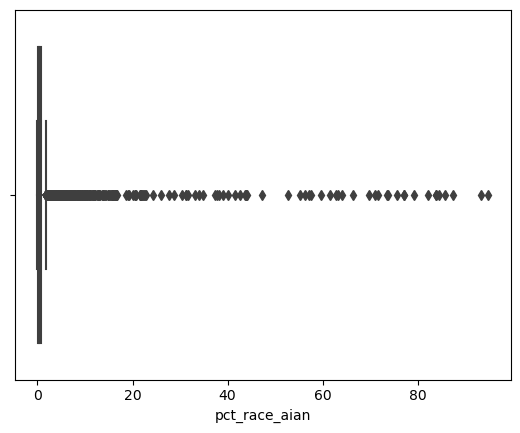

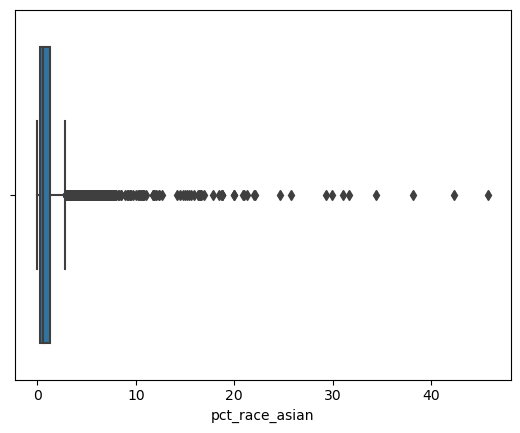

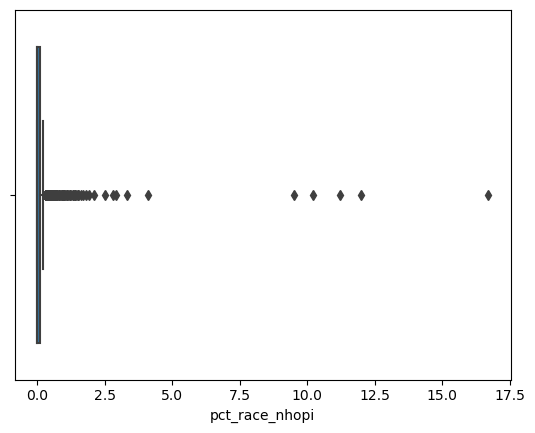

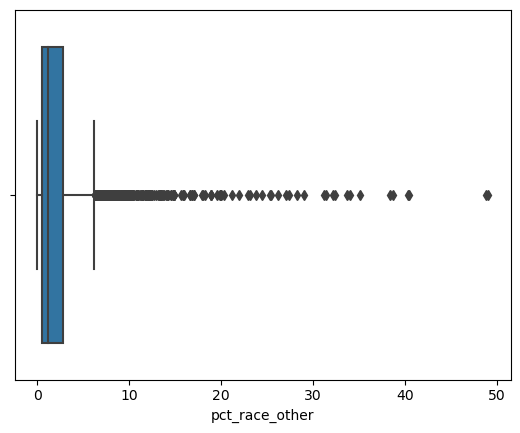

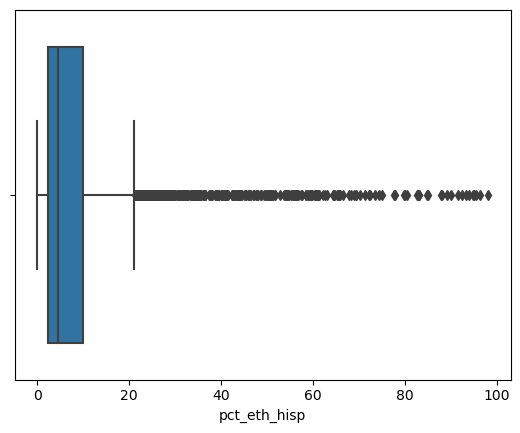

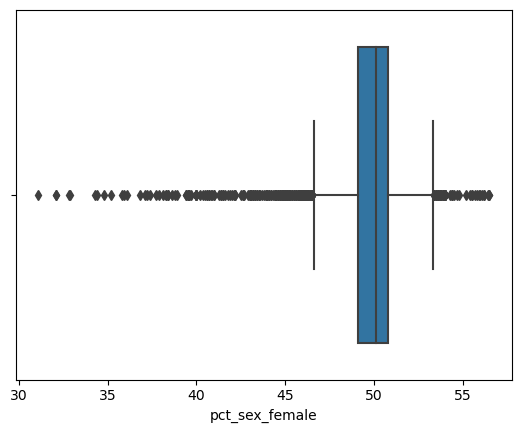

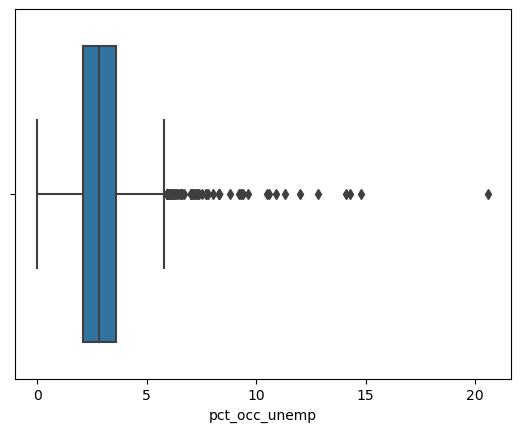

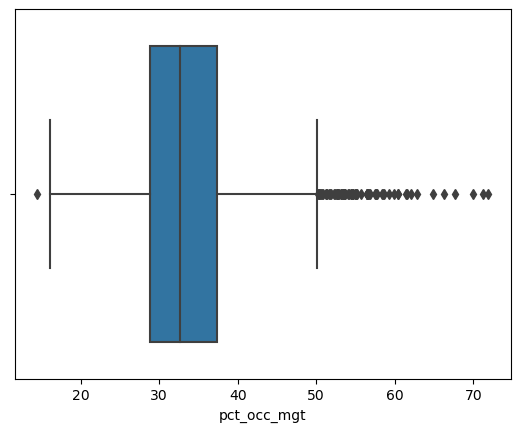

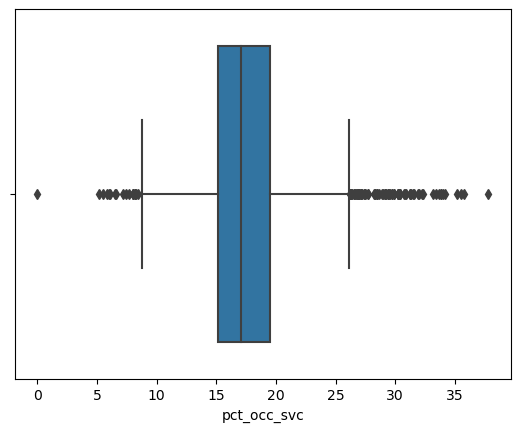

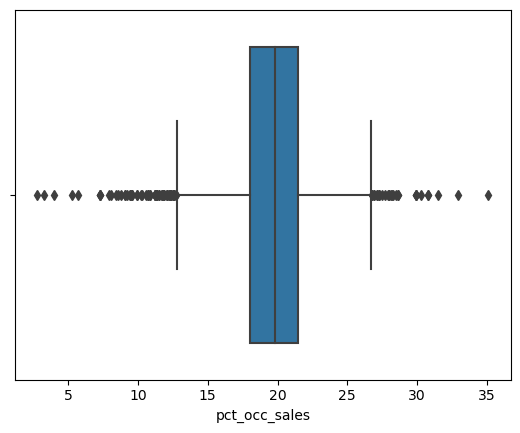

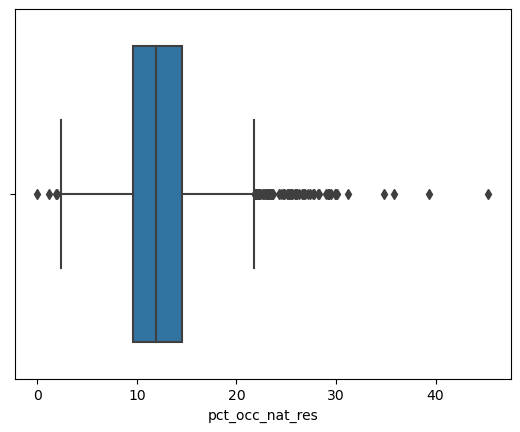

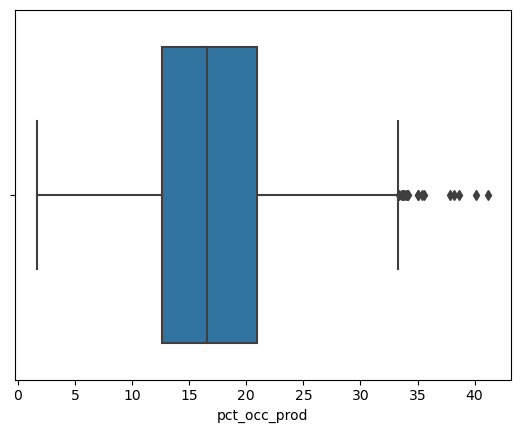

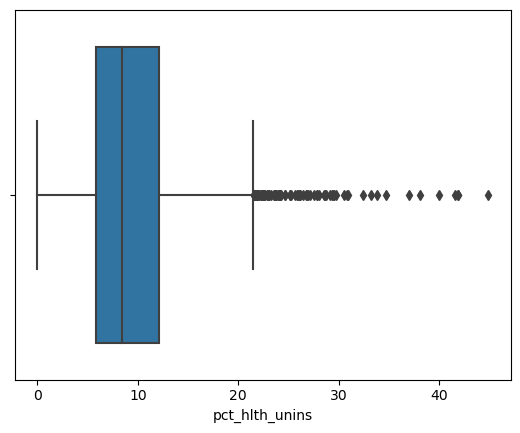

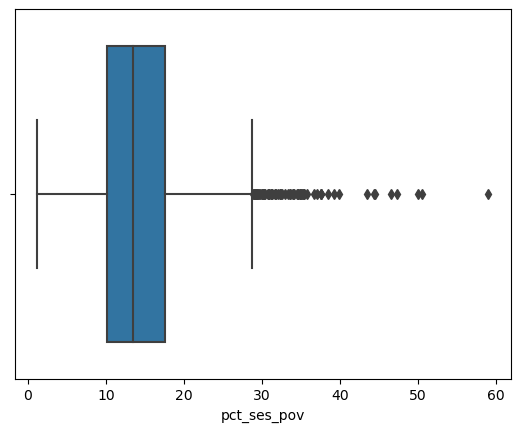

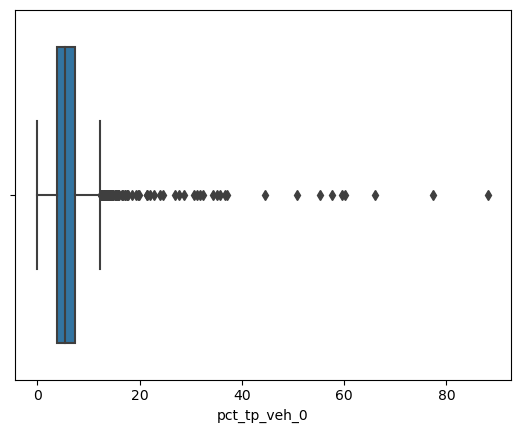

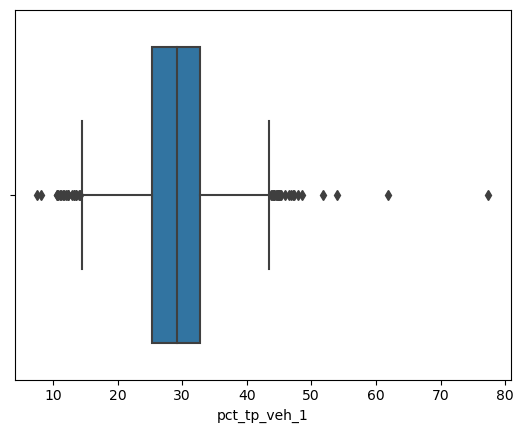

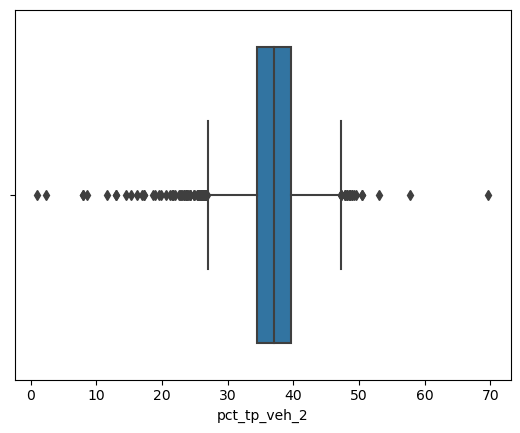

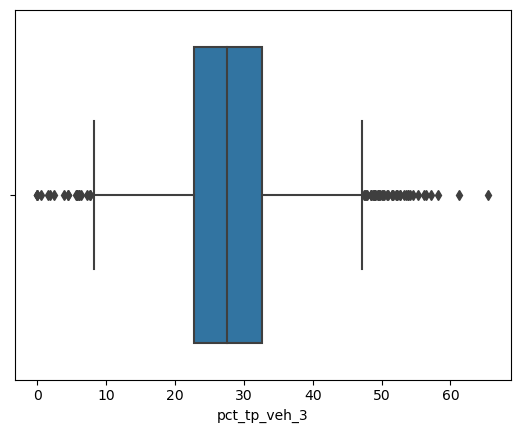

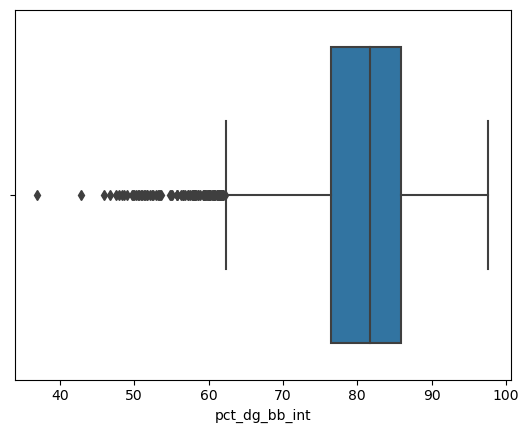

In [16]:
for i in df[features]:
    sns.boxplot(x=df[i])
    plt.show()

## Key Insight
1. Diabetes prevalence is highly correlated with general health. Due to the linear relationship, RQ 2 will be dropped. 

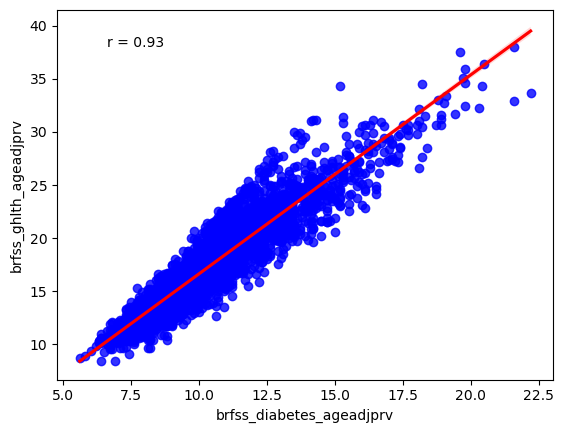

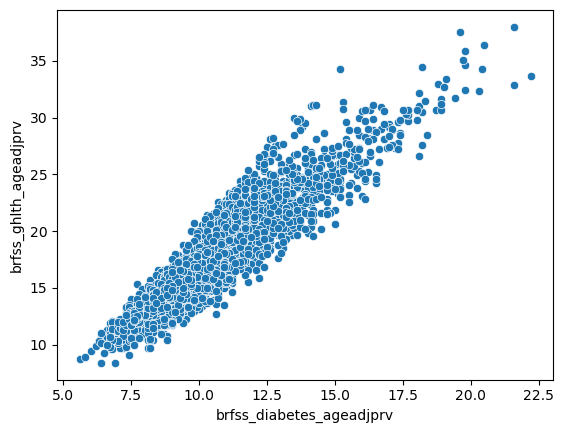

In [17]:
sns.regplot(data=df, x="brfss_diabetes_ageadjprv", y="brfss_ghlth_ageadjprv", line_kws={"color": "red"}, scatter_kws={"color": "blue"}, ci=95)
plt.text(0.1, 0.9, f"r = {round(df['brfss_diabetes_ageadjprv'].corr(df['brfss_ghlth_ageadjprv']), 2)}", transform=plt.gca().transAxes)
plt.show()
sns.scatterplot(data=df, x="brfss_diabetes_ageadjprv", y="brfss_ghlth_ageadjprv")
plt.show()